### INTRODUCTION

INX Future Inc, known as INX, is a prominent provider of data analytics and automation solutions, boasting a global business presence spanning over 15 years. With consistent recognition as one of the top 20 employers in the industry for the past five years, INX prides itself on its employee-friendly human resource policies, widely regarded as best practices within the industry.

However, in recent years, concerns have arisen regarding the health of employee performance indexes, prompting heightened attention from upper management. Escalations in service delivery issues and a notable decline in client satisfaction levels, by 8 percentage points, have been observed. Despite being aware of these issues, CEO Mr. Brain is hesitant to take immediate actions to penalize underperforming employees, fearing potential negative impacts on overall employee morale and subsequent performance. Additionally, maintaining INX's reputation as a top employer and attracting top talent remains a priority.

To address these challenges, Mr. Brain has initiated a data science project aimed at analyzing current employee data to uncover the root causes of performance issues. Leveraging his background as a data scientist, Mr. Brain anticipates that the insights gained from this project will inform strategic decision-making and enable appropriate actions to be taken. Furthermore, he seeks clear indicators of underperformance to facilitate targeted interventions, ensuring minimal disruption to overall employee morale.

#### The following insights are expected from this project:
1. Department wise performances
2. Top 3 Important Factors effecting employee performance
3. A trained model which can predict the employee performance based on factors as inputs. This will be used to hire employees.
4. Recommendations to improve the employee performance based on insights from analysis.

###  Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

### Loading the Data set

In [2]:
pip install xlrd>=1.0.0

Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_excel('INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls')

df

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,...,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,...,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,...,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,...,2,9,3,4,8,7,7,7,No,3


In [4]:
print(df.columns)

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')


### Domain Analysis

1. **EmpNumber:** 
- A unique identifier for each employee
- Useful for tracking and identification purposes

2. **Age:** 
- Represents the age of the employee

3. **Gender:** 
- Indicates the gender of the employee

4. **EducationBackground:**
- Specifies the educational background of the employee which might correlate with different skill sets, knowledge areas, and performance capabilities

5. **MaritalStatus:**
- Employes is single, married or divorced 

6. **EmpDepartment:** 
- Refers to the department within the organization where the employee works

7. **EmpJobRole:** 
- Describes the specific role or position of the employee within their department which vary in responsibilities, skill requirements, and performance metrics

8. **BusinessTravelFrequency:** 
- Indicates how frequently the employee travels for business purposes

9. **DistanceFromHome:** 
- Tells about the distance of the employee's residence from the workplace

10. **EmpEducationLevel:** 
- Represents the highest level of education attained by the employee

11. **EmpEnvironmentSatisfaction:** 
- Indicates the level of satisfaction an employee has with their work environment

12. **EmpHourlyRate:** 
- Represents the employee's hourly wage

13. **EmpJobInvolvement:**
- Reflects the degree to which an employee is engaged in their work

14. **EmpJobLevel:** 
- Indicates the hierarchical level of the employee within the organization

15. **EmpJobSatisfaction:** 
- Measures the level of satisfaction an employee has with their job

16. **NumCompaniesWorked:** 
- Indicates the number of companies the employee has worked for previously

17. **OverTime:**
- Indicates whether the employee works overtime hours

18. **EmpLastSalaryHikePercent:** 
- Represents the percentage increase in salary during the employee's last salary hike

19. **EmpRelationshipSatisfaction:** 
- Reflects the satisfaction level of the employee with their relationships at work

20. **TotalWorkExperienceInYears:** 
- Represents the cumulative experience of the employee in the workforce

21. **TrainingTimesLastYear:** 
- Indicates how many times the employee participated in training programs in the last year

22. **EmpWorkLifeBalance:** 
- Reflects the balance between work demands and personal life

23. **ExperienceYearsAtThisCompany:** 
- Measures how long the employee has been with the current employer

24. **ExperienceYearsInCurrentRole:** 
- Indicates how long the employee has been in their current position

25. **YearsSinceLastPromotion:** 
- Signifies how long it has been since the employee was last promoted

26. **YearsWithCurrManager:** 
- Reflects the duration of the employee's working relationship with their current manager

27. **Attrition:** 
- Indicates whether the employee has left the organization (Yes) or is still employed (No)

28. **PerformanceRating:** 
- Represents the performance evaluation score assigned to the employee

### Basic Checks and Statistical Analysis

In [5]:
df

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,...,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,...,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,...,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,...,2,9,3,4,8,7,7,7,No,3


In [6]:
df.shape

(1200, 28)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

In [8]:
df.describe()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


**Observation:**
- No corrupt data
- No constant data

In [9]:
df.describe(include = 'O')

,EmpNumber,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,OverTime,Attrition
count,1200,1200,1200,1200,1200,1200,1200,1200,1200
unique,1200,2,6,3,6,19,3,2,2
top,E1001000,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Rarely,No,No
freq,1,725,492,548,373,270,846,847,1022


**Observation:**
- 9 Categorical features are present
- No corrupt data
- No constant data

In [10]:
df.isnull().sum()

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

**Observation:**
- No NULL values

### Exploratory Data Analysis

In [11]:
df

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,...,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,...,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,...,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,...,2,9,3,4,8,7,7,7,No,3


#### Univariate Anlysis - Sweetviz Report

In [12]:
# Installation

!pip install sweetviz

In [13]:
import sweetviz as sv

report = sv.analyze(df)
report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


##### Count plot

<Axes: xlabel='Gender', ylabel='count'>

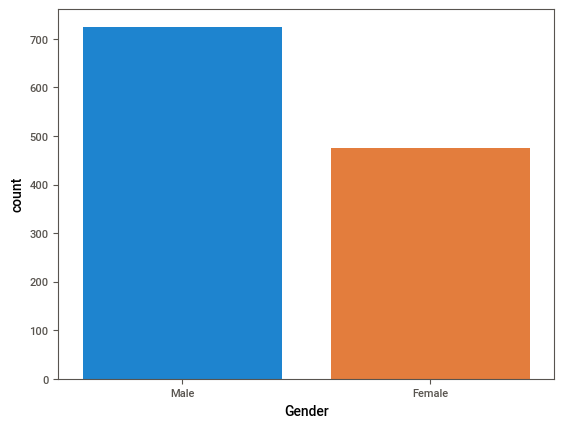

In [14]:
# Gender

sns.countplot(x = 'Gender', data = df)

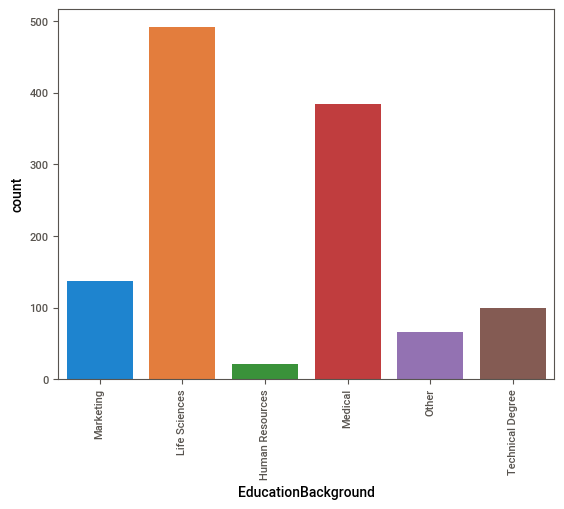

In [15]:
# Education Background

sns.countplot(x = "EducationBackground", data = df)

plt.xticks(rotation = 90)
plt.show()

<Axes: xlabel='EmpJobSatisfaction', ylabel='count'>

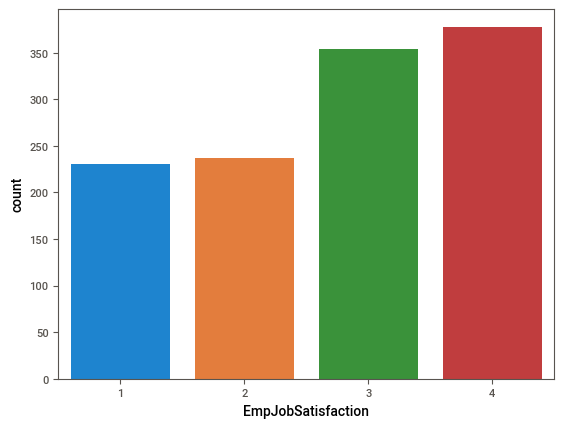

In [16]:
# Employee Job Satisfaction

sns.countplot(x = 'EmpJobSatisfaction', data = df)

<Axes: xlabel='Attrition', ylabel='count'>

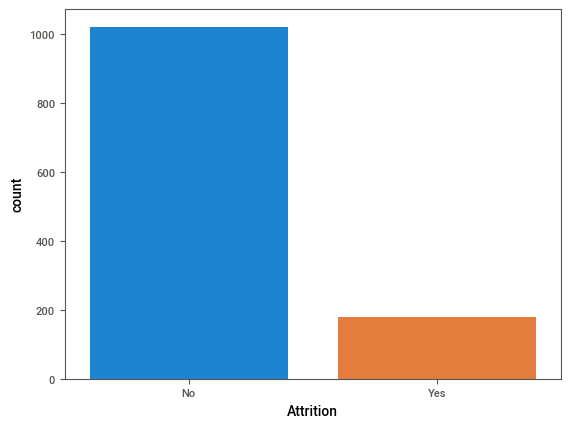

In [17]:
# Attrition

sns.countplot(x = "Attrition", data = df)

<Axes: xlabel='BusinessTravelFrequency', ylabel='count'>

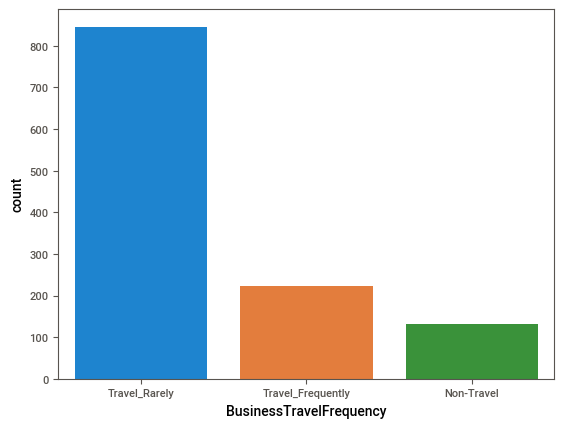

In [18]:
# Business Travel Frequency

sns.countplot(x = "BusinessTravelFrequency", data = df)

<Axes: xlabel='EmpWorkLifeBalance', ylabel='count'>

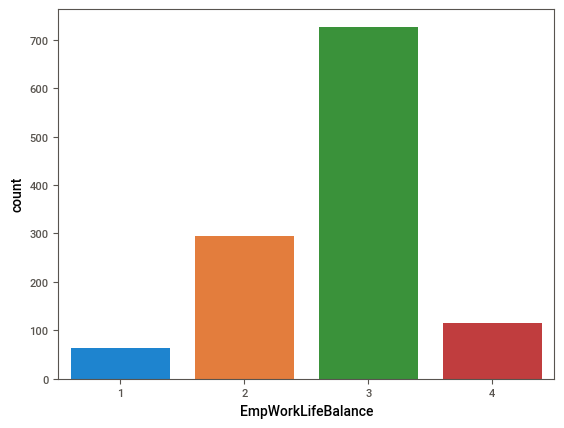

In [19]:
# Work-Life Balance

sns.countplot(x = "EmpWorkLifeBalance", data = df)

<Axes: xlabel='EmpJobInvolvement', ylabel='count'>

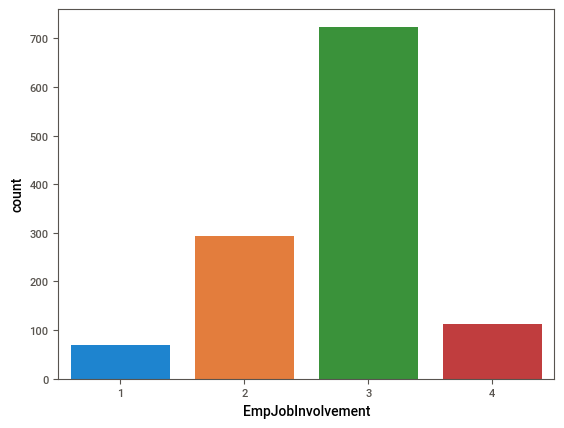

In [20]:
# Employee Job Involvement

sns.countplot(x = "EmpJobInvolvement", data = df)

<Axes: xlabel='EmpHourlyRate', ylabel='Count'>

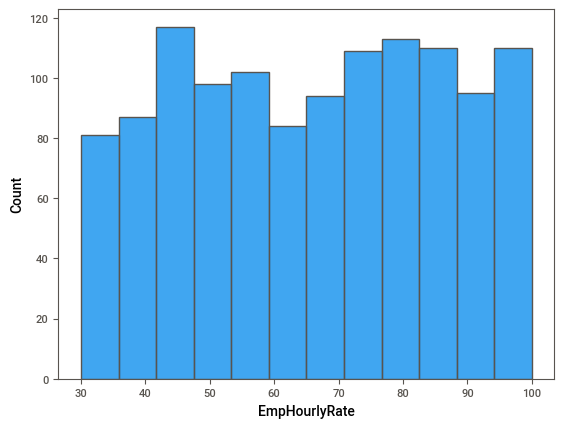

In [21]:
# Employee Hourly Rate

sns.histplot(x = 'EmpHourlyRate', data = df)

<Axes: xlabel='Age', ylabel='Count'>

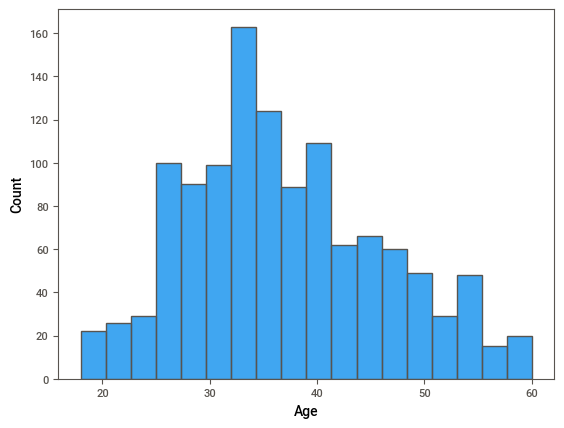

In [22]:
# Age

sns.histplot(x = 'Age', data = df)

<Axes: xlabel='TotalWorkExperienceInYears', ylabel='Count'>

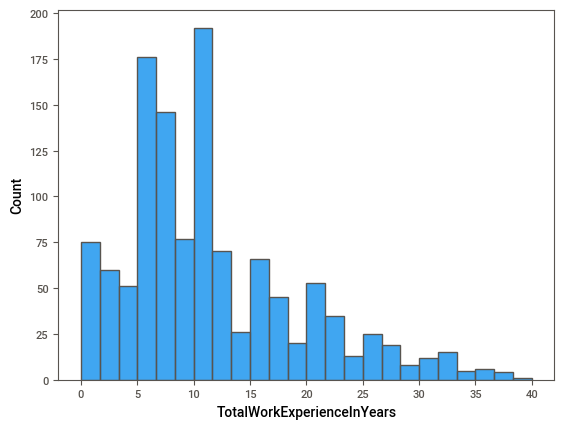

In [23]:
# Total Work Experience in Years

sns.histplot(x = 'TotalWorkExperienceInYears', data = df)

<Axes: xlabel='OverTime', ylabel='count'>

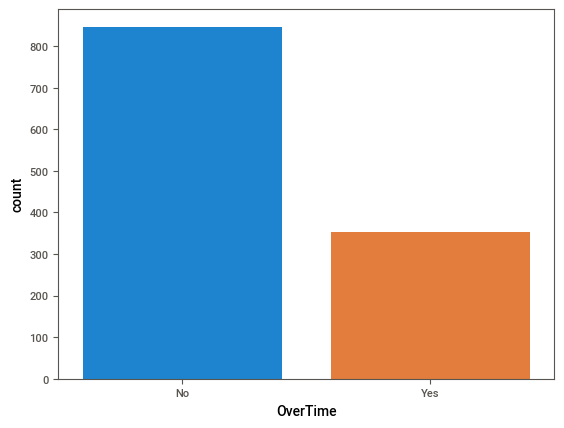

In [24]:
# Overtime

sns.countplot(x = 'OverTime', data = df)

<Axes: xlabel='DistanceFromHome', ylabel='Count'>

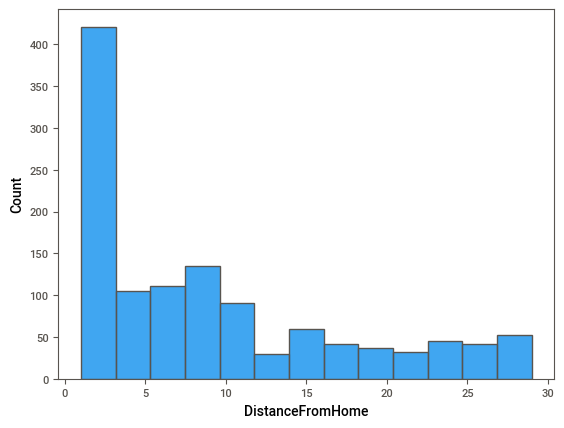

In [25]:
# Distance From Home

sns.histplot(x = 'DistanceFromHome', data = df)

<Axes: xlabel='ExperienceYearsAtThisCompany', ylabel='Count'>

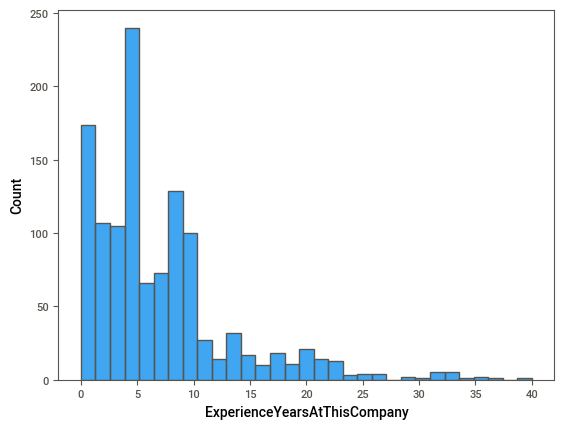

In [26]:
# Experience Years At This Company

sns.histplot(x = 'ExperienceYearsAtThisCompany', data = df)

### BUSINESS CASE 1: 
#### To give insights on the Employees performances for different Departments 

#### Bivariate Analysis

#### I. Plot for the Total Number of Employees working in Each Department

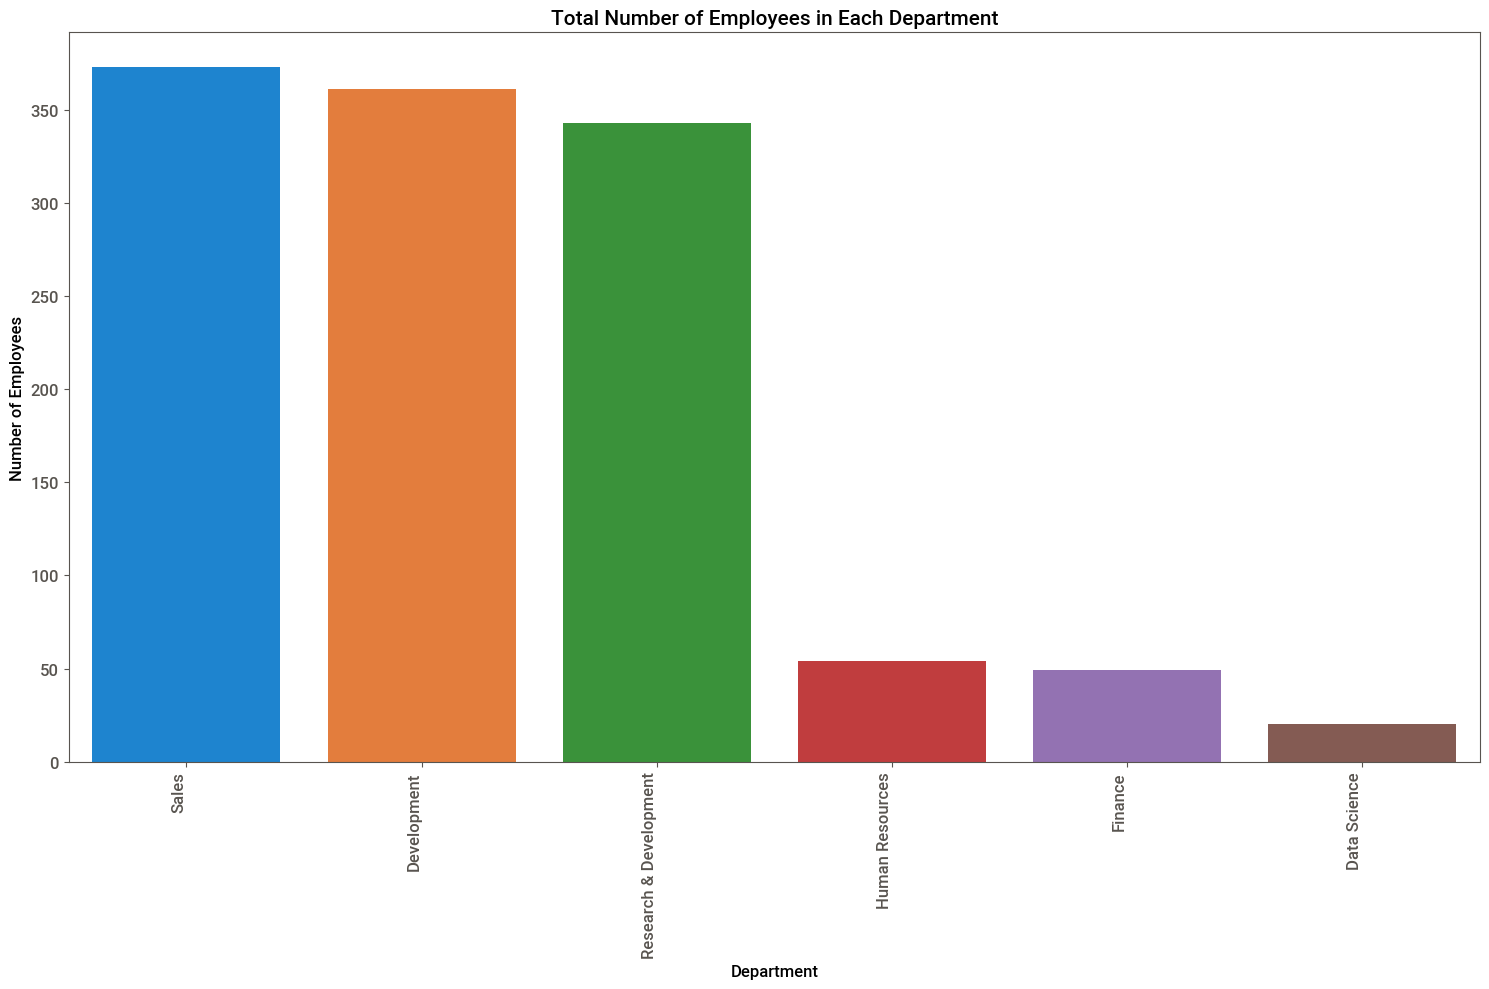

In [27]:
# Count the number of employees in each department
department_counts = df['EmpDepartment'].value_counts()

# Plot the graph
plt.figure(figsize = (15, 10))
sns.barplot(x = department_counts.index, y = department_counts.values)

plt.title('Total Number of Employees in Each Department', fontsize = 15)
plt.xlabel('Department', fontsize = 12)
plt.ylabel('Number of Employees', fontsize = 12)
plt.xticks(rotation = 90, ha = 'right', fontsize = 12)  # Rotate x-axis labels and increase font size
plt.yticks(fontsize = 12)  # Increase font size of y-axis labels

plt.tight_layout()
plt.show()

#### INSIGHTS:

From the above plot, we can infer that:
1. The maximum number of employees are from **Sales Department** followed by **Development Department** with next as **Research & Development Department**. The number of employees in these departments are between 330 to 370.
2. There are very less number of employees working in Human Resources, Finance and Data Science Department as compared to other three departments.
3. Least number of employees work in **Data Science department** with **nearly 20 in number**.

#### II. Plot Showing Performance Rating trend in Each Department

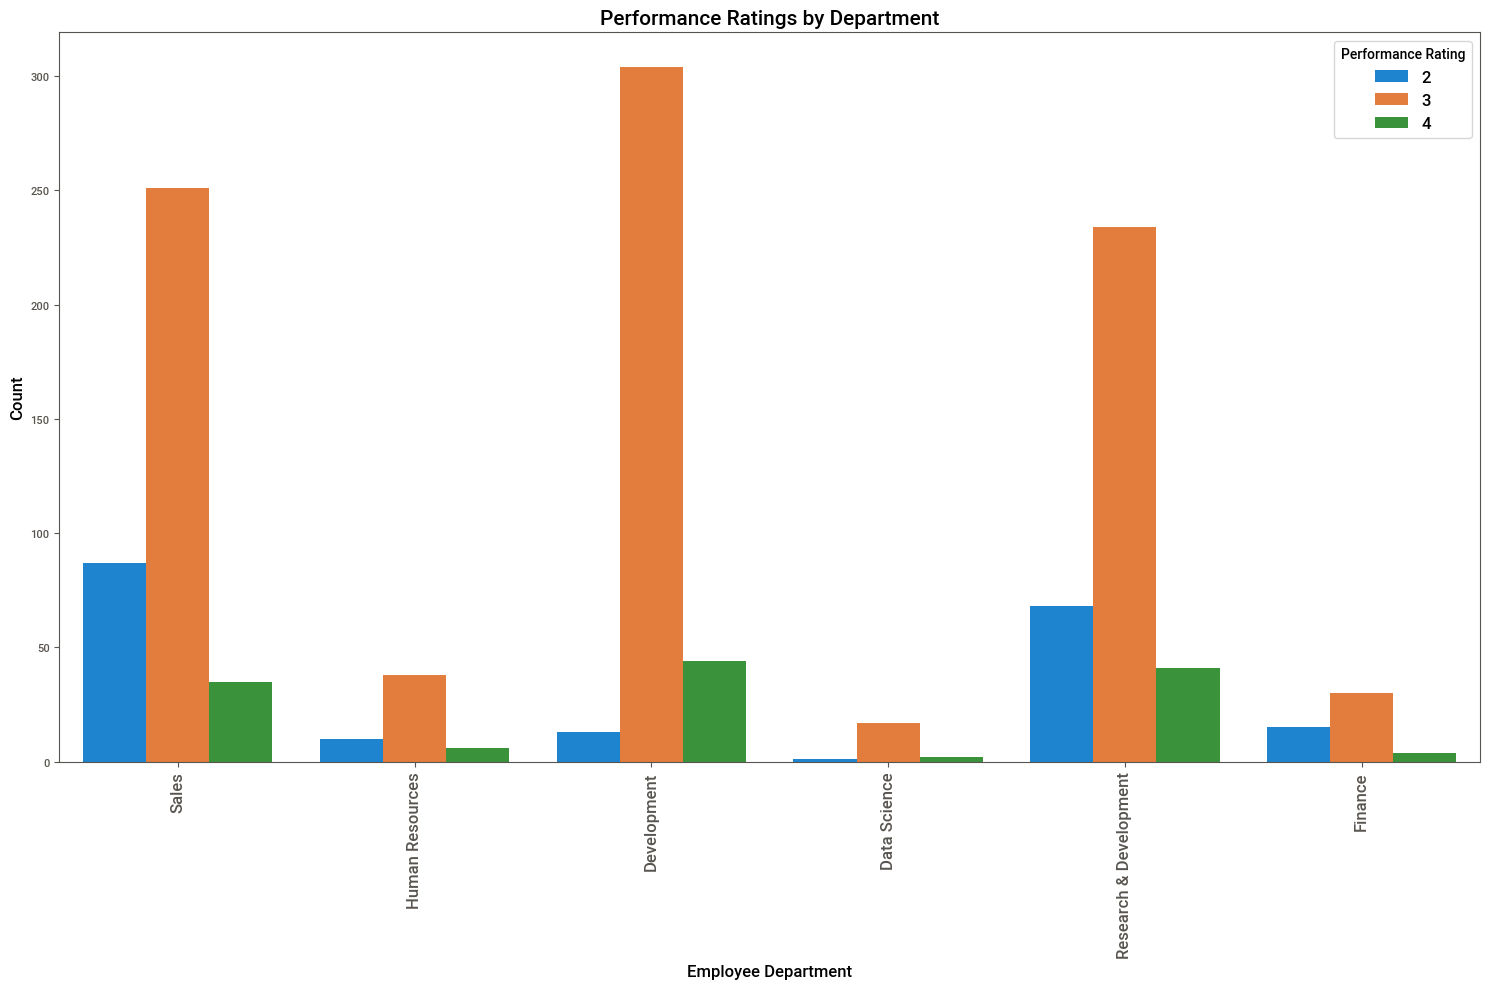

In [28]:
plt.figure(figsize = (15, 10))

sns.countplot(x = 'EmpDepartment', hue = df.PerformanceRating, data = df)

plt.title('Performance Ratings by Department', fontsize = 15)
plt.xlabel('Employee Department', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.xticks(rotation = 90, fontsize = 12)
plt.legend(title = 'Performance Rating', fontsize = 12)

plt.tight_layout()
plt.show()

#### INSIGHTS:

The above count plot provides insights into the distribution of performance ratings across different departments within the organization. Some insights based on the visualization are as follows:

1. **Sales Department:** 
- This department has a relatively **higher count of employees** with **performance ratings in the range of 3**, indicating that a significant portion of employees in this department perform moderately to well. 
- There is also a considerable count of employees having performance ratings of 2, suggesting some underperformance issues that might need to be addressed.

2. **Development Department:**
- This department shows a **similar distribution of performance ratings**, with a **larger count of employees** rated as **3**. This indicates that the majority of employees in this department perform above average. 
- Also, the **highest number of employees getting rating as 4** is from this department.

3. **Research & Development Department:** 
- The count of employees with performance ratings of 3 is notably higher in the Research & Development department compared to other departments, indicating a strong performance trend in this department. 
- There is also a significant count of employees with performance ratings of 2, suggesting that some improvement opportunities might exist.

4. **Human Resources Department:** 
- This department exhibits a relatively **balanced distribution of performance ratings**, with counts spread across ratings 2, 3 and 4. Most of the employees are performing average with rating of 3.

5. **Finance Department:**
- This department also shows a **balanced distribution of ratings**, with a mix of performance ratings across the range of 2, 3, and 4.

6. **Data Science Department:**
- This department seems to have a relatively higher proportion of employees with performance ratings of 3, indicating most of the employees are performing above average. However, there is also a noticeable count of employees with performance ratings of 3, suggesting room for further improvement or optimization.

These insights provide an overview of the performance distribution within each department, highlighting areas of strength as well as potential improvement opportunities.

#### III. Performance Rating with respect to Number of Employees in Each Department

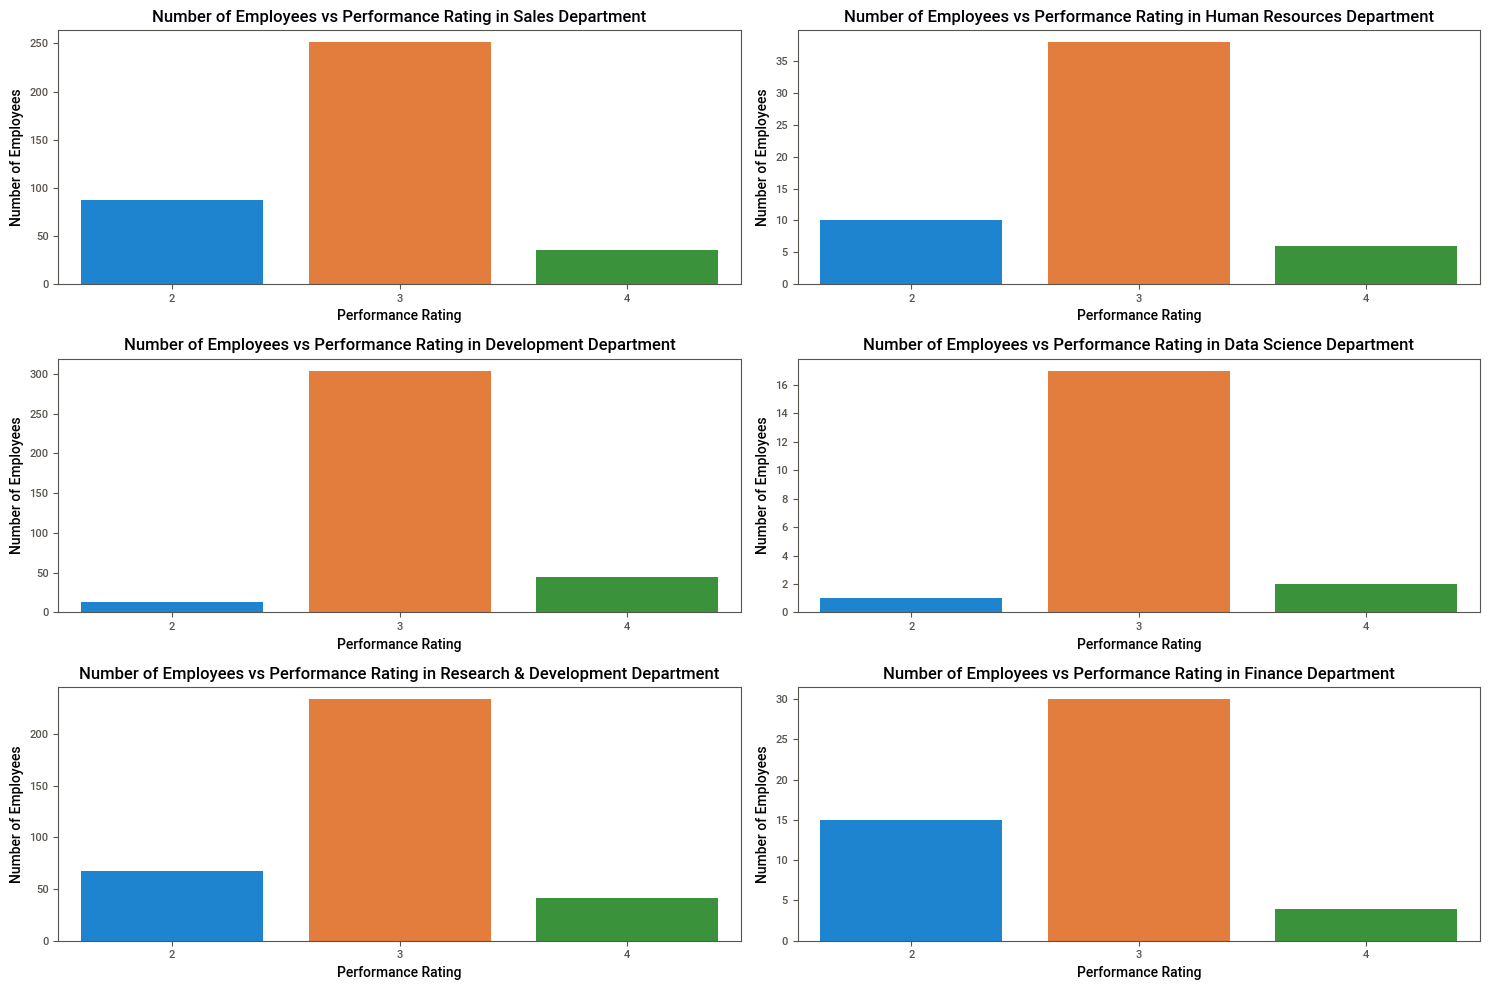

In [29]:
plt.figure(figsize = (15, 10))

# Get unique departments
departments = df['EmpDepartment'].unique()

# Create a subplot for each department
for i, department in enumerate(departments, 1):
    plt.subplot(3, 2, i)
    sns.countplot(x = 'PerformanceRating', data = df[df['EmpDepartment'] == department])
    plt.xlabel('Performance Rating')
    plt.ylabel('Number of Employees')
    plt.title(f'Number of Employees vs Performance Rating in {department} Department')
    
# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

#### INSIGHTS:

From the above plot, we can deduce following insights:
1. In all Department, maximum employees received **rating of 3**.
2. In **Sales Department**, number of employees falling in rating 3 are approx. 240, followed by rating 2 (nearly 80 numbers). Near 30 number of employees received rating of 4 in this department.
3. In **Human Resources Department**, as we saw there are overall less number of employees working, hence the number of employees receiving rating of 3 and 4 are around 37 and 5 respectively. Around 10 employees received least rating of 2.
4. In **Development Department**, maximum number of employees received rating of 3 (nearly 300), followed by rating of 4 (nearly 50). Very less number of employees in this department gained 2 rating. **Overall performance of the department seems very good as compared to other departments**.
5. In **Data Science Department**, as total number of employees are least, maximum number of employees got rating of 3 followed by 4 (around 20). Only 1 employees received rating of 2 in the whole department.
6. In **Research & Development Department**, nearly 240 employees received rating of 3, followed by rating of 2 (nearly 60-70). Around 40 employees received 4 rating in this department.
7. In **Finance Department**, most empolyees (approx. 30) received rating of 3, followed by rating of 2 and very less received 4 as rating in this department.

#### IV. Performance Rating with respect to Gender in Each Department

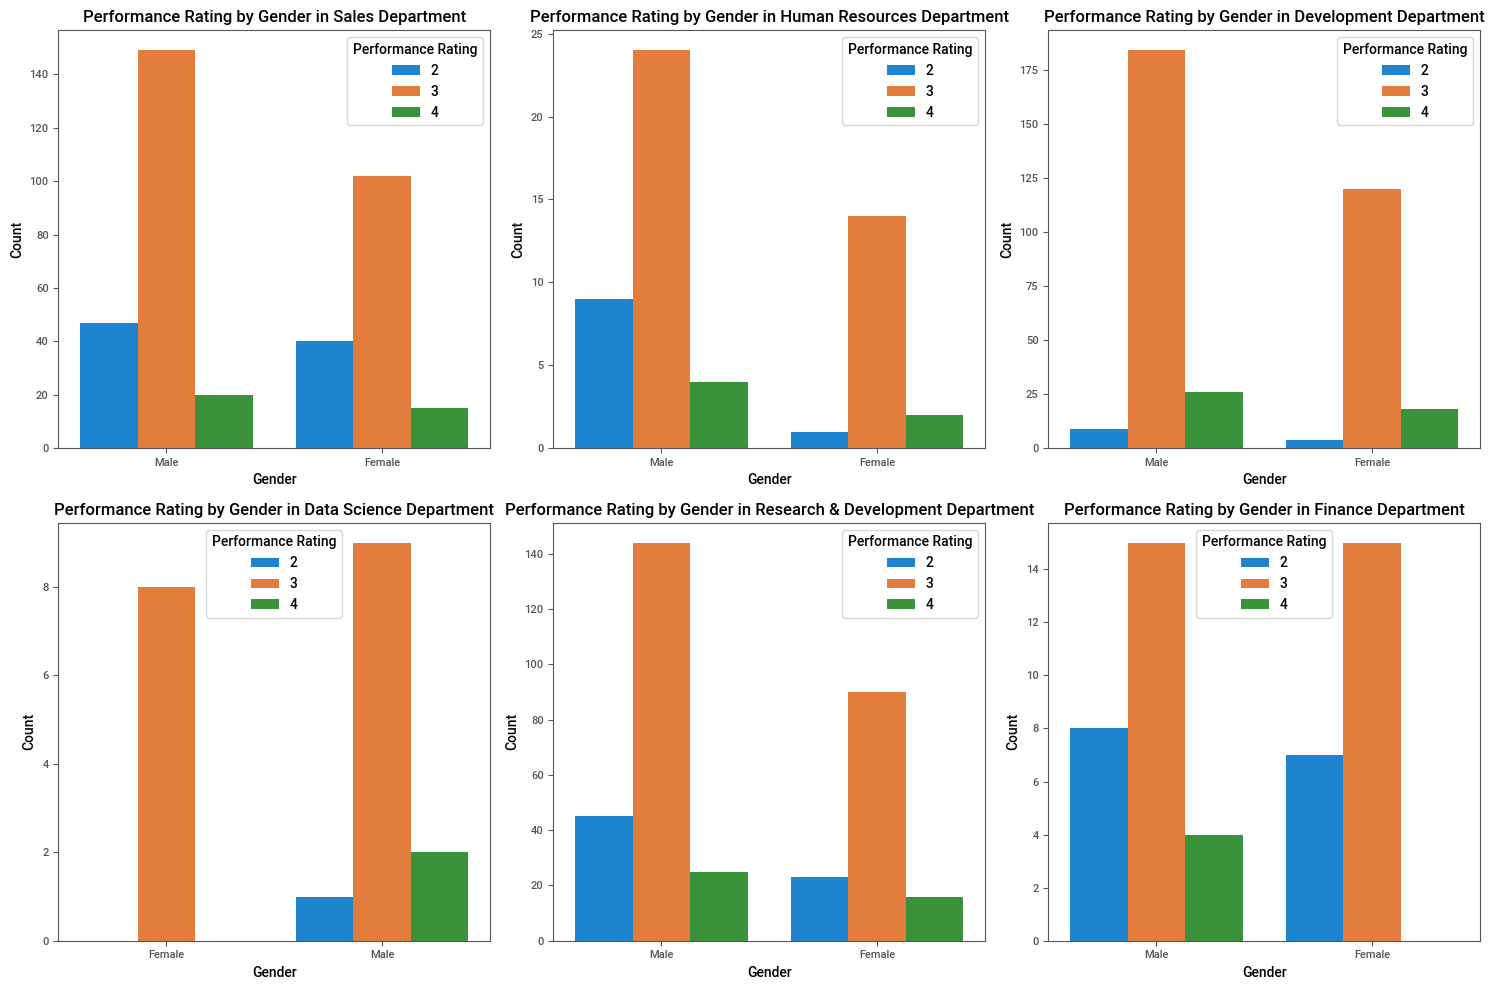

In [30]:
# Create a figure with subplots for each department
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Get unique departments
departments = df['EmpDepartment'].unique()

# Iterate over each department and create a plot
for i, department in enumerate(departments):
    # Filter data for the current department
    department_data = df[df['EmpDepartment'] == department]
    
    # Create a count plot for performance rating based on gender
    ax = axes[i // 3, i % 3]  # Determine subplot location
    sns.countplot(x = 'Gender', hue = 'PerformanceRating', data = department_data, ax = ax)
    
    # Set plot title and labels
    ax.set_title(f'Performance Rating by Gender in {department} Department')
    ax.set_xlabel('Gender')
    ax.set_ylabel('Count')
    ax.legend(title = 'Performance Rating')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

#### INSIGHTS:

From the above plot, the following insights can be drawn:
1. There are more number of **Male** employees than **Female** employees in all the departments.
2. Overall **Female** employees have outperformed than **Male** employees considering all the departments.
3. No female employees received least rating of 2 in Data Science department.
4. Most of male or female employees received a rating of 3 in each department.
5. Ony **Male** employees received rating of 4 in Finance department. 
6. **Maximum number of employees** receiving **rating of 4** are from **Development Department and Research & Development Department**. 

#### V. Performance Rating with respect to Total Work Experience in Each Department

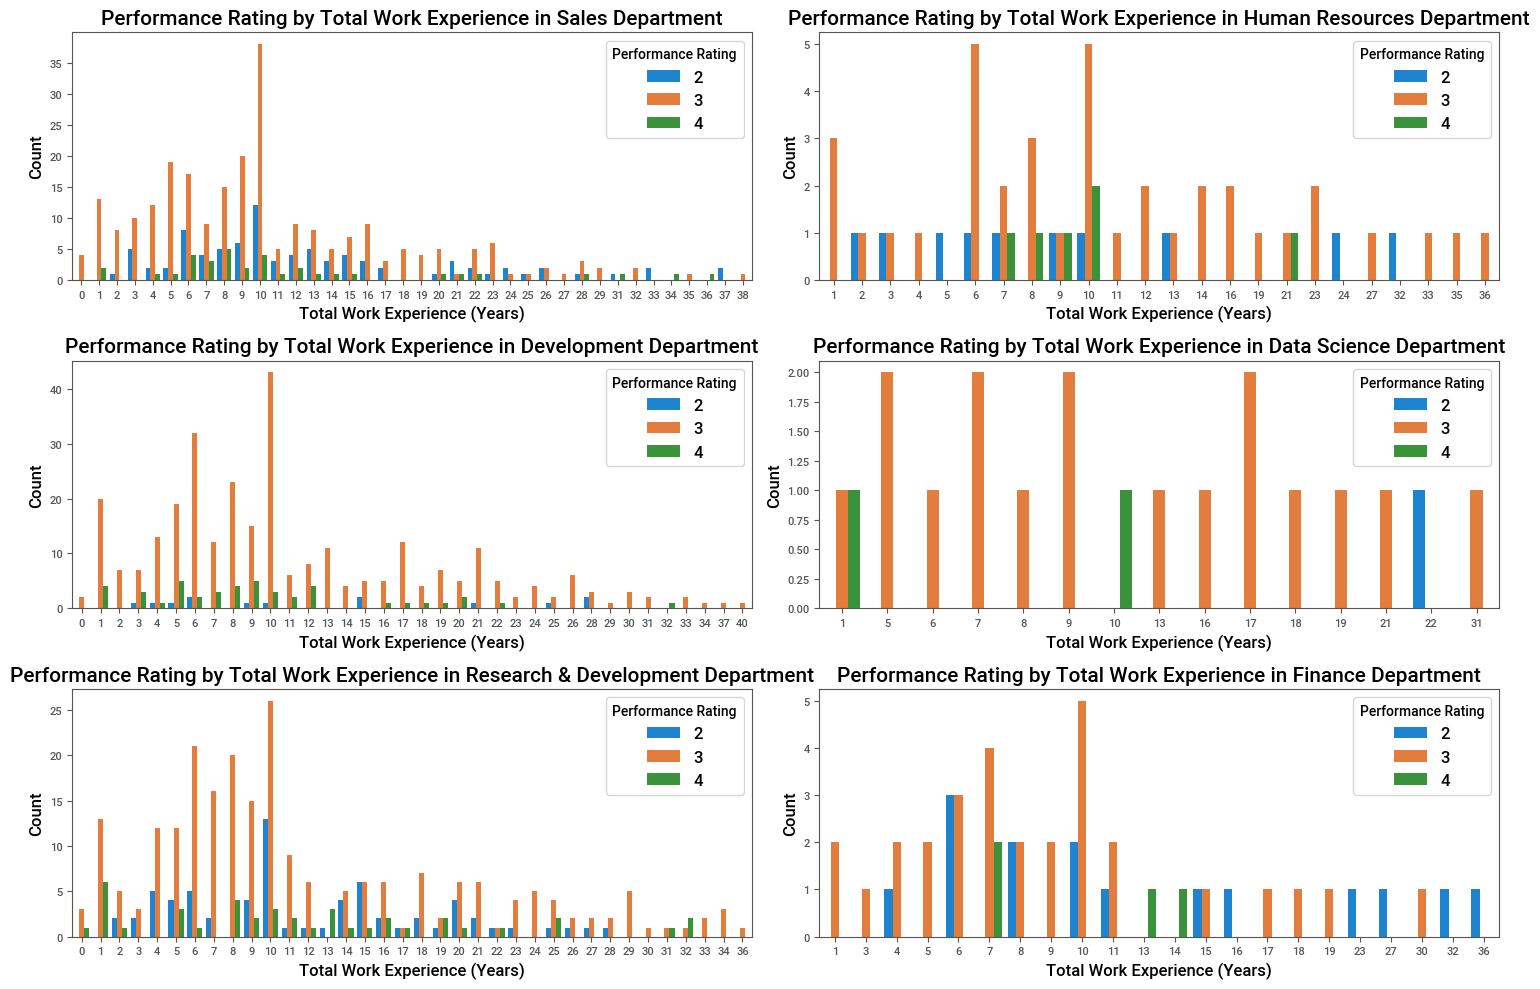

In [31]:
# Create a figure with subplots for each department
fig, axes = plt.subplots(3, 2, figsize = (15, 10))

# Get unique departments
departments = df['EmpDepartment'].unique()

# Iterate over each department and create a plot
for i, department in enumerate(departments):
    # Filter data for the current department
    department_data = df[df['EmpDepartment'] == department]
    
    # Determine subplot location
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    
    # Create a count plot for performance rating based on total work experience
    sns.countplot(x = 'TotalWorkExperienceInYears', hue = 'PerformanceRating', data = department_data, ax = ax)
    
    # Set plot title and labels
    ax.set_title(f'Performance Rating by Total Work Experience in {department} Department', fontsize = 15)
    ax.set_xlabel('Total Work Experience (Years)', fontsize = 12)
    ax.set_ylabel('Count', fontsize = 12)
    ax.legend(title = 'Performance Rating', fontsize = 12)

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()


#### INSIGHTS:

From the above plot, we can infer that:
1. **Maximum number of employees** who received a rating of 3 or 4, have around 7 to 10 years of work experience.
2. Most of the employees in **Data Science** department have received **rating of 3** and is irrespective of the work experience they have.
3. Most of the employees in **Research & Development** department have performed better with **increasing work experience**. More are they experienced, better is their performance. Employees with **more that 28 years of experience** have performed better and **none** of those employees received rating of 2.

### Data Preprocessing 

In [32]:
df

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,...,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,...,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,...,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,...,2,9,3,4,8,7,7,7,No,3


##### Dropping Unwanted Columns

In [33]:
new_df = df.drop(['EmpNumber'], axis = 1)

In [34]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Age                           1200 non-null   int64 
 1   Gender                        1200 non-null   object
 2   EducationBackground           1200 non-null   object
 3   MaritalStatus                 1200 non-null   object
 4   EmpDepartment                 1200 non-null   object
 5   EmpJobRole                    1200 non-null   object
 6   BusinessTravelFrequency       1200 non-null   object
 7   DistanceFromHome              1200 non-null   int64 
 8   EmpEducationLevel             1200 non-null   int64 
 9   EmpEnvironmentSatisfaction    1200 non-null   int64 
 10  EmpHourlyRate                 1200 non-null   int64 
 11  EmpJobInvolvement             1200 non-null   int64 
 12  EmpJobLevel                   1200 non-null   int64 
 13  EmpJobSatisfaction

##### Segregating Numerical Data Columns

In [35]:
numerical_columns = new_df.select_dtypes(include = ['float64', 'int64']).columns

print("Numerical Data Headings:")
print(numerical_columns)

Numerical Data Headings:
Index(['Age', 'DistanceFromHome', 'EmpEducationLevel',
       'EmpEnvironmentSatisfaction', 'EmpHourlyRate', 'EmpJobInvolvement',
       'EmpJobLevel', 'EmpJobSatisfaction', 'NumCompaniesWorked',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'PerformanceRating'],
      dtype='object')


##### Checking for Outliers

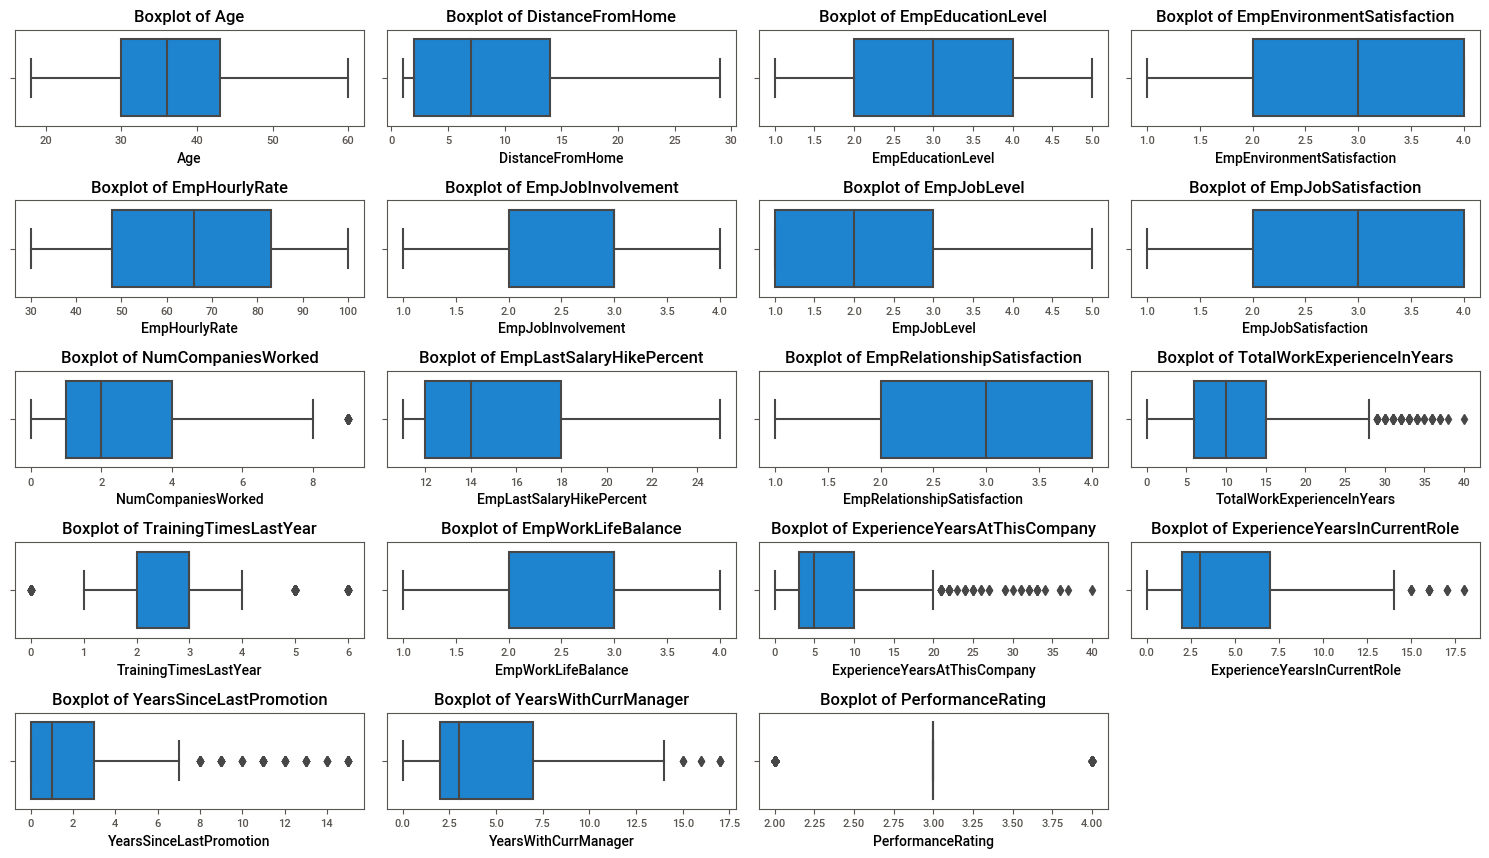

In [36]:
plt.figure(figsize = (15, 10))
plot_number = 1

for column in numerical_columns:
    plt.subplot(6, 4, plot_number)
    sns.boxplot(x = new_df[column])
    plt.title(f'Boxplot of {column}', fontsize = 12)
    plot_number += 1

plt.tight_layout()
plt.show()

**Observation:** The columns which are having outliers are as follows:

1. Number of Companies Worked
2. Total Work Experience In Years
3. Training Times Last Year
4. Experience Years At This Company
5. Experience Years In CurrentRole
6. Years Since Last Promotion
7. Years With Curr Manager

So, these features will be handled for the outliers.

##### Handling Outliers

In [37]:
from scipy import stats

def handle_outliers(data, column):
    
    # Calculate quartiles
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)

    # Calculate IQR
    iqr = q3 - q1

    # Define lower and upper bounds
    min_limit = q1 - 1.5 * iqr
    max_limit = q3 + 1.5 * iqr

    # Replace outliers with the nearest limit
    data[column] = data[column].apply(lambda x: min_limit if x < min_limit else (max_limit if x > max_limit else x))

    return data

In [38]:
columns_to_handle = ['NumCompaniesWorked', 'TotalWorkExperienceInYears', 'TrainingTimesLastYear', 
                     'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion', 
                     'YearsWithCurrManager']

In [39]:
# Apply outlier handling to each column in 'columns_to_handle'

for column in columns_to_handle:
    new_df = handle_outliers(new_df, column)

new_df.head() # Print the first few rows to verify the changes

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,...,4,10.0,2.0,2,10.0,7.0,0.0,8.0,No,3
1,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,...,4,20.0,2.0,3,7.0,7.0,1.0,7.0,No,3
2,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,...,3,20.0,2.0,3,18.0,13.0,1.0,12.0,No,4
3,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,...,2,23.0,2.0,2,20.5,6.0,7.5,6.0,No,3
4,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,...,4,10.0,1.0,3,2.0,2.0,2.0,2.0,No,3


##### Rechecking for Outliers after Handling

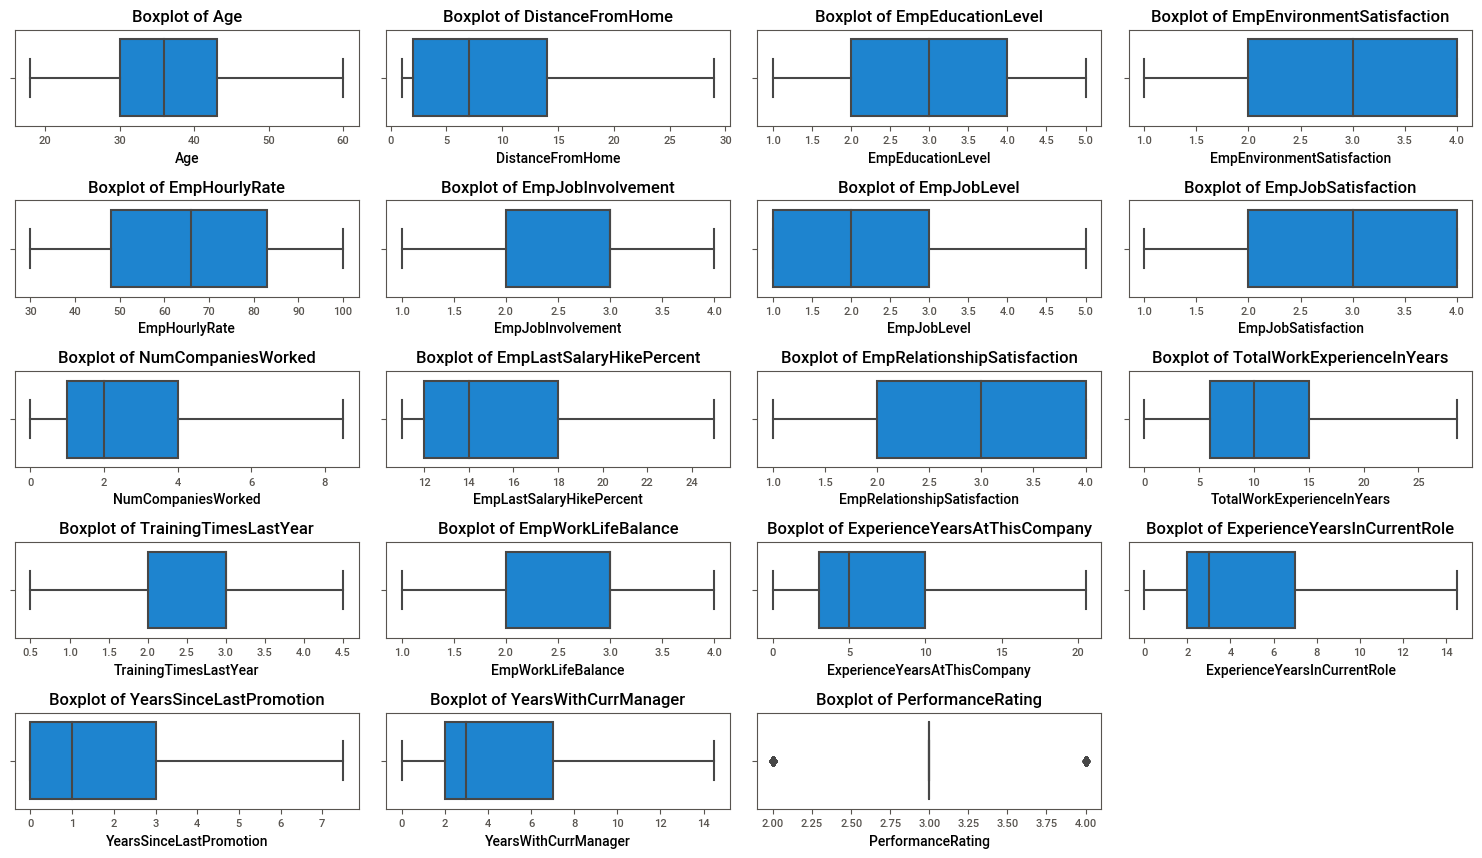

In [40]:
plt.figure(figsize = (15, 10))
plot_number = 1

for column in numerical_columns:
    plt.subplot(6, 4, plot_number)
    sns.boxplot(x = new_df[column])
    plt.title(f'Boxplot of {column}', fontsize = 12)
    plot_number += 1

plt.tight_layout()
plt.show()

##### Segregating Categorical Data Columns

In [41]:
categorical_columns = new_df.select_dtypes(include=['object']).columns

print("Categorical Data Headings:")
print(categorical_columns)

Categorical Data Headings:
Index(['Gender', 'EducationBackground', 'MaritalStatus', 'EmpDepartment',
       'EmpJobRole', 'BusinessTravelFrequency', 'OverTime', 'Attrition'],
      dtype='object')


##### Converting Categorical Data into Numeric Data

**Gender**

In [42]:
unique_genders = new_df['Gender'].unique()

print("Unique genders:", unique_genders)

Unique genders: ['Male' 'Female']


In [43]:
new_df['Gender'] = new_df['Gender'].map({'Male': 0, 
                                         'Female': 1})

print(new_df['Gender'])

0       0
1       0
2       0
3       0
4       0
       ..
1195    1
1196    0
1197    0
1198    1
1199    1
Name: Gender, Length: 1200, dtype: int64


**Educational Backgrounds**

In [44]:
unique_EducationBackgrounds = new_df['EducationBackground'].unique()

print("Unique EducationBackground:", unique_EducationBackgrounds)

Unique EducationBackground: ['Marketing' 'Life Sciences' 'Human Resources' 'Medical' 'Other'
 'Technical Degree']


In [45]:
new_df['EducationBackground'] = new_df['EducationBackground'].map({'Marketing': 1, 
                                                                   'Life Sciences': 2, 
                                                                   'Human Resources': 3, 
                                                                   'Medical': 4, 
                                                                   'Technical Degree': 5, 
                                                                   'Other': 0})

print(new_df['EducationBackground'])

0       1
1       1
2       2
3       3
4       1
       ..
1195    4
1196    2
1197    4
1198    4
1199    2
Name: EducationBackground, Length: 1200, dtype: int64


**Marital Status**

In [46]:
unique_MaritalStatus = new_df['MaritalStatus'].unique()

print("Unique MaritalStatus:", unique_MaritalStatus)

Unique MaritalStatus: ['Single' 'Married' 'Divorced']


In [47]:
new_df['MaritalStatus'] = new_df['MaritalStatus'].map({'Single': 1,
                                                       'Married': 2,
                                                       'Divorced': 3})

print(new_df['MaritalStatus'])

0       1
1       1
2       2
3       3
4       1
       ..
1195    3
1196    1
1197    2
1198    1
1199    1
Name: MaritalStatus, Length: 1200, dtype: int64


**Employee Department**

In [48]:
unique_EmpDepartment = new_df['EmpDepartment'].unique()

print("Unique EmpDepartment:", unique_EmpDepartment)

Unique EmpDepartment: ['Sales' 'Human Resources' 'Development' 'Data Science'
 'Research & Development' 'Finance']


In [49]:
new_df['EmpDepartment'] = new_df['EmpDepartment'].map({'Sales': 1, 
                                                       'Human Resources': 2, 
                                                       'Development': 3, 
                                                       'Data Science': 4, 
                                                       'Research & Development': 5,
                                                       'Finance': 6})

print(new_df['EmpDepartment'])

0       1
1       1
2       1
3       2
4       1
       ..
1195    1
1196    3
1197    3
1198    4
1199    1
Name: EmpDepartment, Length: 1200, dtype: int64


**Employee Job Role**

In [50]:
unique_EmpJobRole = new_df['EmpJobRole'].unique()

print("Unique EmpJobRole:", unique_EmpJobRole)

Unique EmpJobRole: ['Sales Executive' 'Manager' 'Developer' 'Sales Representative'
 'Human Resources' 'Senior Developer' 'Data Scientist'
 'Senior Manager R&D' 'Laboratory Technician' 'Manufacturing Director'
 'Research Scientist' 'Healthcare Representative' 'Research Director'
 'Manager R&D' 'Finance Manager' 'Technical Architect' 'Business Analyst'
 'Technical Lead' 'Delivery Manager']


In [51]:
new_df['EmpJobRole'] = new_df['EmpJobRole'].map({'Sales Executive': 1, 
                                                 'Manager': 2, 
                                                 'Developer': 3,
                                                 'Sales Representative': 4, 
                                                 'Human Resources': 5, 
                                                 'Senior Developer': 6,
                                                 'Data Scientist': 7,
                                                 'Senior Manager R&D': 8,
                                                 'Laboratory Technician': 9,
                                                 'Manufacturing Director': 10,
                                                 'Research Scientist': 11,
                                                 'Healthcare Representative': 12,
                                                 'Research Director': 13,
                                                 'Manager R&D': 14,
                                                 'Finance Manager': 15,
                                                 'Technical Architect': 16,
                                                 'Business Analyst': 18,
                                                 'Technical Lead': 19,
                                                 'Delivery Manager': 20})

print(new_df['EmpJobRole'])

0       1
1       1
2       1
3       2
4       1
       ..
1195    1
1196    6
1197    6
1198    7
1199    1
Name: EmpJobRole, Length: 1200, dtype: int64


**Business Travel Frequency**

In [52]:
unique_BusinessTravelFrequency = new_df['BusinessTravelFrequency'].unique()

print("Unique BusinessTravelFrequency:", unique_BusinessTravelFrequency)

Unique BusinessTravelFrequency: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']


In [53]:
new_df['BusinessTravelFrequency'] = new_df['BusinessTravelFrequency'].map({'Travel_Rarely': 1, 
                                                                           'Travel_Frequently': 2, 
                                                                           'Non-Travel':0})

print(new_df['BusinessTravelFrequency'])

0       1
1       1
2       2
3       1
4       1
       ..
1195    2
1196    1
1197    1
1198    1
1199    1
Name: BusinessTravelFrequency, Length: 1200, dtype: int64


**OverTime**

In [54]:
unique_OverTime = new_df['OverTime'].unique()

print("Unique OverTime:", unique_OverTime)

Unique OverTime: ['No' 'Yes']


In [55]:
new_df['OverTime'] = new_df['OverTime'].map({'No': 0,
                                             'Yes': 1})

print(new_df['OverTime'])

0       0
1       0
2       1
3       0
4       0
       ..
1195    1
1196    0
1197    1
1198    0
1199    0
Name: OverTime, Length: 1200, dtype: int64


**Attrition**

In [56]:
unique_Attrition = new_df['Attrition'].unique()

print("Unique Attrition:", unique_Attrition)

Unique Attrition: ['No' 'Yes']


In [57]:
new_df['Attrition'] = new_df['Attrition'].map({'No': 0, 
                                               'Yes': 1})

print(new_df['Attrition'])

0       0
1       0
2       0
3       0
4       0
       ..
1195    0
1196    0
1197    0
1198    0
1199    1
Name: Attrition, Length: 1200, dtype: int64


In [58]:
new_df.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,0,1,1,1,1,1,10,3,4,...,4,10.0,2.0,2,10.0,7.0,0.0,8.0,0,3
1,47,0,1,1,1,1,1,14,4,4,...,4,20.0,2.0,3,7.0,7.0,1.0,7.0,0,3
2,40,0,2,2,1,1,2,5,4,4,...,3,20.0,2.0,3,18.0,13.0,1.0,12.0,0,4
3,41,0,3,3,2,2,1,10,4,2,...,2,23.0,2.0,2,20.5,6.0,7.5,6.0,0,3
4,60,0,1,1,1,1,1,16,4,1,...,4,10.0,1.0,3,2.0,2.0,2.0,2.0,0,3


### Feature Engineering

In [59]:
# Calculate the Correlation Matrix

correlation_matrix = new_df.corr()

correlation_matrix

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
Age,1.000000,0.040107,-0.013461,0.098368,0.032231,0.025847,-0.011196,0.020937,0.207313,0.013814,...,0.049749,0.678801,-0.004681,-0.019563,0.293021,0.214702,0.204328,0.204620,-0.189317,-0.040164
Gender,0.040107,1.000000,0.000513,-0.042169,-0.020296,-0.026141,0.042369,0.001507,0.022960,-0.000033,...,-0.030707,0.064584,0.054382,-0.015793,0.043753,0.031832,0.031520,0.036087,-0.035758,0.001780
EducationBackground,-0.013461,0.000513,1.000000,0.006813,0.228615,0.189770,-0.021831,-0.019672,-0.097431,-0.018221,...,0.035567,0.002981,0.046811,-0.013970,0.007499,-0.020276,0.031136,-0.011533,-0.001073,-0.018153
MaritalStatus,0.098368,-0.042169,0.006813,1.000000,0.042913,0.035900,-0.026075,0.019148,-0.026737,0.032467,...,-0.026410,0.097979,-0.019596,-0.014154,0.076408,0.076399,0.041698,0.063380,-0.162969,-0.024172
EmpDepartment,0.032231,-0.020296,0.228615,0.042913,1.000000,0.740093,0.007411,0.029370,-0.006808,0.052889,...,-0.039008,0.021976,-0.014246,-0.045793,-0.025998,-0.025501,-0.026036,-0.022041,-0.079475,0.023695
EmpJobRole,0.025847,-0.026141,0.189770,0.035900,0.740093,1.000000,-0.017734,0.011397,-0.017381,0.072547,...,-0.032097,0.005899,-0.021040,-0.045174,-0.044879,-0.037333,-0.050134,-0.023313,-0.093940,0.006515
BusinessTravelFrequency,-0.011196,0.042369,-0.021831,-0.026075,0.007411,-0.017734,1.000000,-0.044148,-0.016810,-0.013393,...,0.018370,0.006379,0.030928,0.006703,0.001403,-0.030285,0.001989,-0.006214,0.129229,0.004928
DistanceFromHome,0.020937,0.001507,-0.019672,0.019148,0.029370,0.011397,-0.044148,1.000000,0.045856,-0.017719,...,-0.009509,0.027012,-0.039017,-0.044788,0.024916,0.020975,0.021456,0.016618,0.063248,-0.046142
EmpEducationLevel,0.207313,0.022960,-0.097431,-0.026737,-0.006808,-0.017381,-0.016810,0.045856,1.000000,-0.037103,...,-0.016690,0.146630,-0.010859,0.010276,0.065261,0.067697,0.058112,0.087003,-0.049118,0.020529
EmpEnvironmentSatisfaction,0.013814,-0.000033,-0.018221,0.032467,0.052889,0.072547,-0.013393,-0.017719,-0.037103,1.000000,...,-0.010504,-0.018166,0.002377,-0.000262,-0.000953,0.028774,0.011969,-0.012109,-0.123490,0.395561


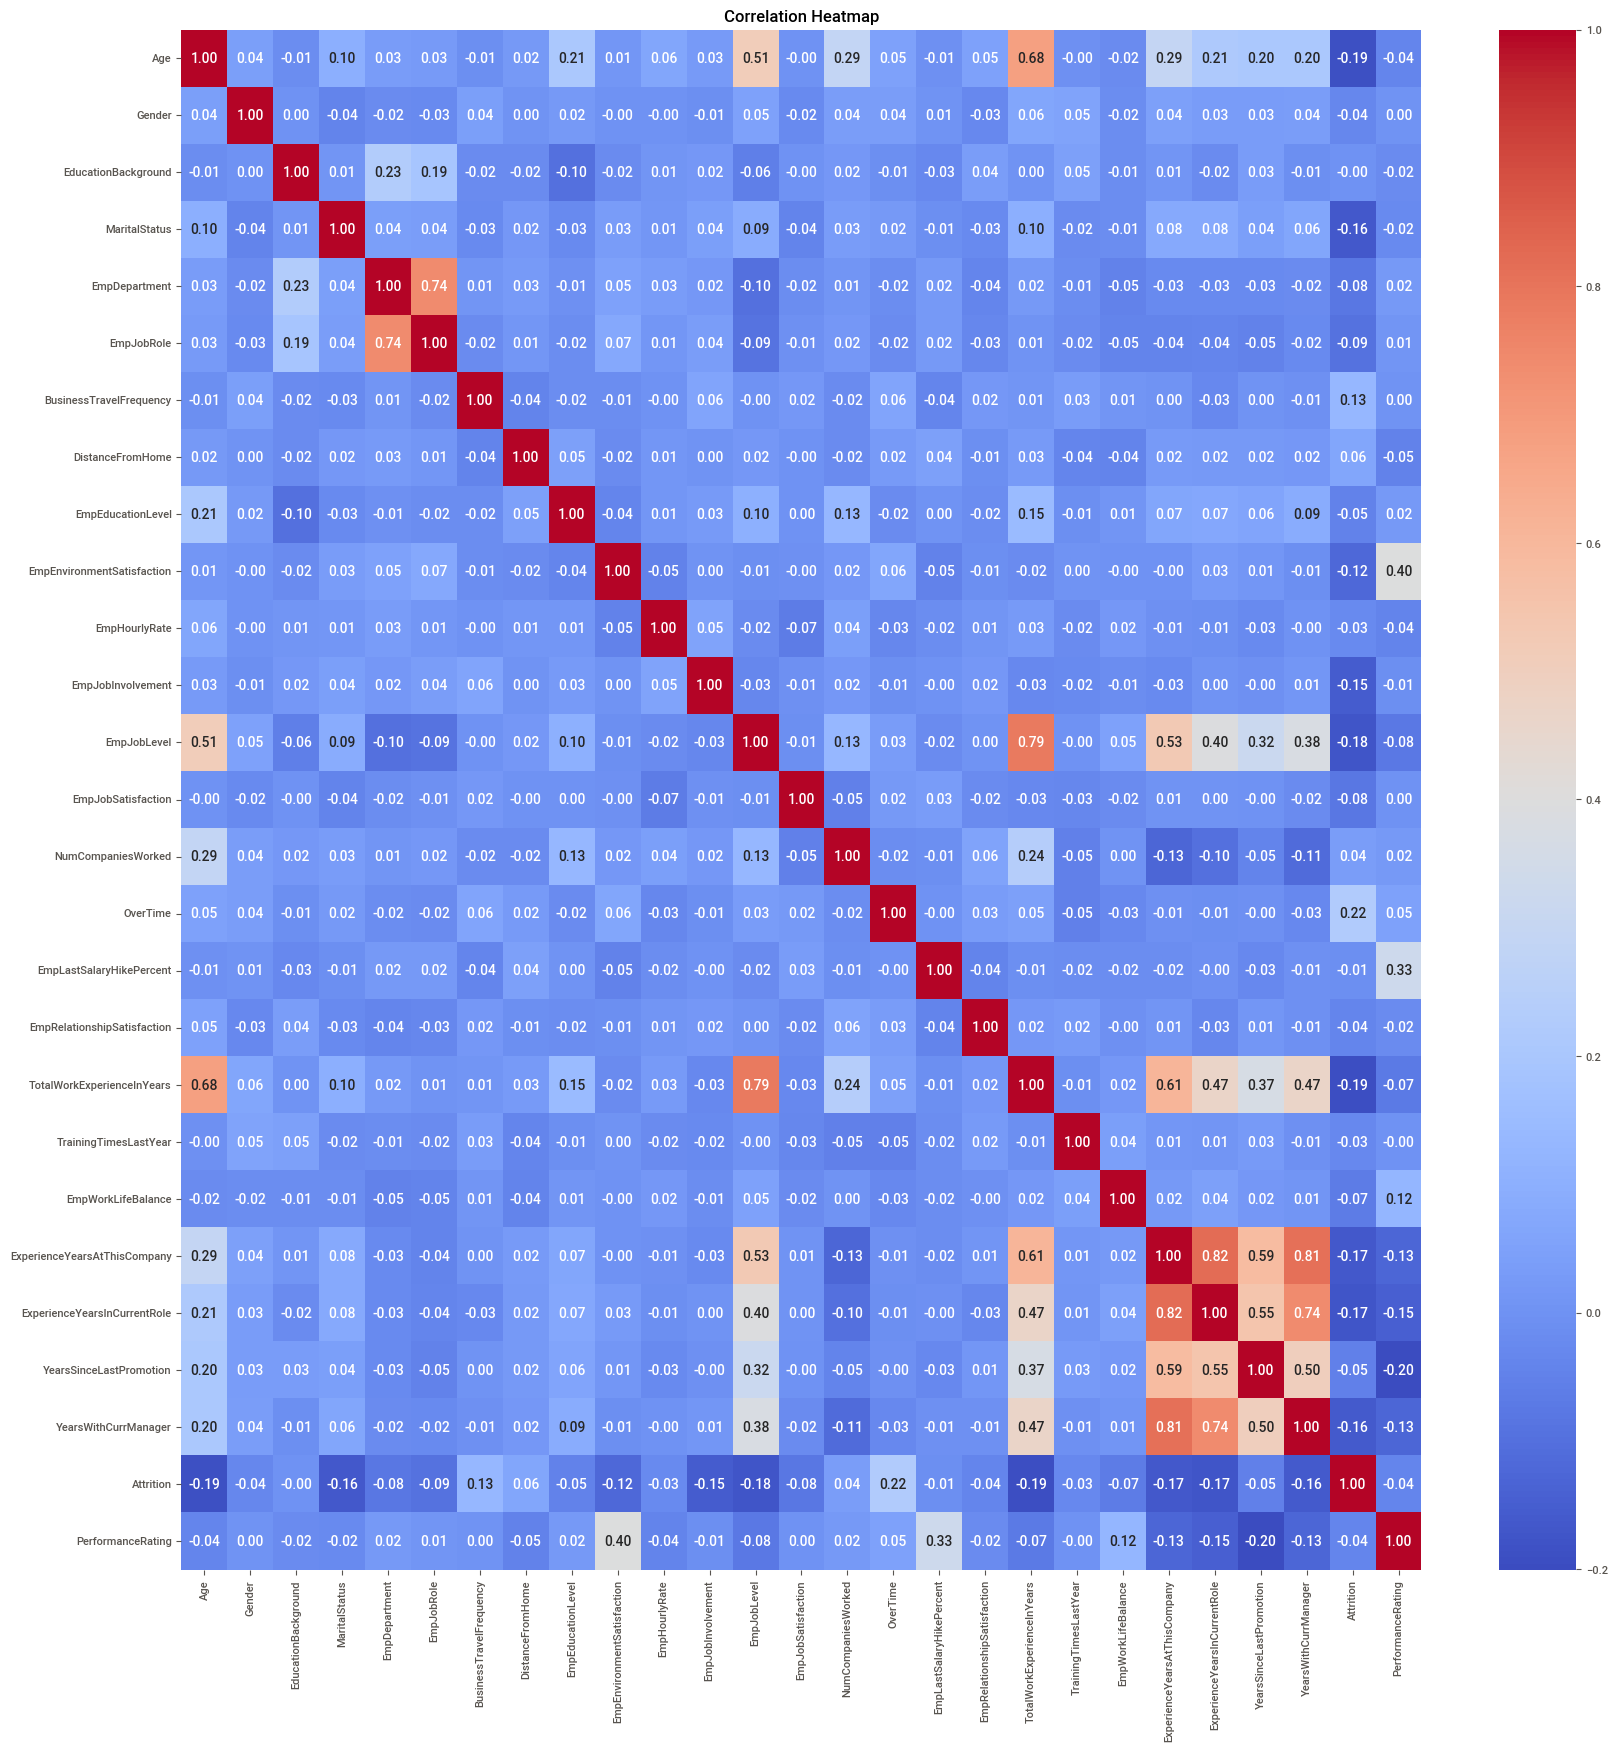

In [60]:
# Create a Heatmap

plt.figure(figsize = (20, 20))

sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt = ".2f")

plt.title('Correlation Heatmap')
plt.show()

**Observation:**
- No significant correlation between features

### BUSINESS CASE 3: 
#### To Create a Trained Model which can Predict the Employee Performance based on factors as inputs which will be used to hire employees

### Model Creation

##### Creating Training And Testing Data

In [61]:
# Assuming 'features' is a list of feature columns and 'target' is the target variable column

X = new_df.drop(columns = ['PerformanceRating']) 

y = new_df['PerformanceRating']

In [62]:
X

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,32,0,1,1,1,1,1,10,3,4,...,12,4,10.0,2.0,2,10.0,7.0,0.0,8.0,0
1,47,0,1,1,1,1,1,14,4,4,...,12,4,20.0,2.0,3,7.0,7.0,1.0,7.0,0
2,40,0,2,2,1,1,2,5,4,4,...,21,3,20.0,2.0,3,18.0,13.0,1.0,12.0,0
3,41,0,3,3,2,2,1,10,4,2,...,15,2,23.0,2.0,2,20.5,6.0,7.5,6.0,0
4,60,0,1,1,1,1,1,16,4,1,...,14,4,10.0,1.0,3,2.0,2.0,2.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,27,1,4,3,1,1,2,3,1,4,...,20,2,6.0,3.0,3,6.0,5.0,0.0,4.0,0
1196,37,0,2,1,3,6,1,10,2,4,...,17,1,4.0,2.0,3,1.0,0.0,0.0,0.0,0
1197,50,0,4,2,3,6,1,28,1,4,...,11,3,20.0,3.0,3,20.0,8.0,3.0,8.0,0
1198,34,1,4,1,4,7,1,9,3,4,...,14,2,9.0,3.0,4,8.0,7.0,7.0,7.0,0


In [63]:
y

0       3
1       3
2       4
3       3
4       3
       ..
1195    4
1196    3
1197    3
1198    3
1199    2
Name: PerformanceRating, Length: 1200, dtype: int64

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [65]:
X_train.shape

(960, 26)

In [66]:
y_train.shape

(960,)

In [67]:
X_test.shape

(240, 26)

In [68]:
y_test.shape

(240,)

##### Balancing Data

In [69]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

X_smote, y_smote = smote.fit_resample(X_train, y_train)

In [70]:
X_smote.shape

(2070, 26)

In [71]:
y_smote.shape

(2070,)

#### 1. LOGISTIC REGRESSION ALGORITHM

In [72]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
LR = LogisticRegression(random_state = 42)

# Train the model
LR.fit(X_smote, y_smote)

LogisticRegression(random_state=42)

In [73]:
# Make predictions on the testing set

y_pred_LR = LR.predict(X_test)
y_pred_LR

array([2, 2, 3, 3, 3, 3, 2, 3, 2, 4, 3, 4, 3, 2, 3, 4, 3, 3, 4, 2, 2, 3,
       3, 3, 4, 4, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 2, 3, 3, 3, 2, 4, 4, 3,
       3, 3, 3, 2, 2, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 4, 3, 3, 2,
       2, 4, 3, 2, 2, 3, 4, 4, 3, 2, 3, 3, 2, 3, 3, 3, 3, 4, 3, 3, 3, 3,
       3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 4, 3, 3, 3, 3,
       3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2,
       3, 3, 3, 3, 4, 3, 3, 2, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2,
       3, 2, 3, 4, 3, 4, 3, 3, 2, 3, 3, 3, 3, 2, 2, 4, 3, 3, 3, 2, 4, 3,
       2, 2, 3, 3, 4, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 4, 2, 4, 2, 3, 2, 3,
       3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3,
       3, 3, 3, 2, 4, 4, 2, 4, 3, 3, 3, 4, 3, 4, 4, 2, 3, 3, 3, 3],
      dtype=int64)

##### Model Evaluation for Logistic Regression Algorithm

In [74]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [75]:
# Evaluate the model
accuracy_LR = accuracy_score(y_test, y_pred_LR)

# Print accuracy in percentage format
print("Accuracy:", '{:.2f}%'.format(accuracy_LR * 100))

Accuracy: 75.83%


#### 2. SUPPORT VECTOR MACHINE ALGORITHM

In [76]:
from sklearn.svm import SVC

# Initialize the SVM classifier
SVM = SVC(kernel='linear', random_state = 42)

# Train the classifier
SVM.fit(X_smote, y_smote)

SVC(kernel='linear', random_state=42)

In [77]:
# Make predictions on the testing set

y_pred_SVM = SVM.predict(X_test)
y_pred_SVM

array([2, 2, 3, 3, 3, 3, 2, 3, 3, 4, 3, 4, 3, 2, 2, 3, 3, 3, 4, 4, 2, 3,
       3, 3, 3, 4, 3, 3, 3, 3, 3, 4, 3, 4, 2, 3, 2, 3, 3, 3, 2, 3, 4, 3,
       3, 3, 3, 2, 2, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 4, 4, 3, 2,
       3, 4, 3, 3, 2, 3, 4, 4, 3, 3, 3, 3, 2, 3, 3, 3, 3, 4, 4, 3, 3, 3,
       3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 4, 3, 3, 2, 3,
       3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 2,
       3, 3, 3, 3, 4, 3, 3, 4, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 4,
       3, 2, 3, 4, 2, 3, 3, 3, 2, 3, 3, 4, 3, 4, 2, 4, 3, 3, 3, 2, 2, 3,
       2, 3, 3, 3, 4, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 2, 2, 4, 2, 3, 3, 3,
       3, 4, 3, 3, 2, 2, 2, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3,
       3, 2, 3, 2, 4, 4, 2, 4, 3, 3, 3, 2, 3, 4, 4, 2, 3, 3, 4, 3],
      dtype=int64)

##### Model Evaluation for Support Vector Machine Algorithm

In [78]:
from sklearn.metrics import accuracy_score

In [79]:
# Evaluate the model
accuracy_SVM = accuracy_score(y_test, y_pred_SVM)

# Print accuracy in percentage format
print("Accuracy:", '{:.2f}%'.format(accuracy_SVM * 100))

Accuracy: 72.92%


#### 3. DECISION TREE ALGORITHM

In [80]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier
DT = DecisionTreeClassifier(random_state = 42)

# Train the classifier
DT.fit(X_smote, y_smote)

DecisionTreeClassifier(random_state=42)

In [81]:
# Make predictions on the testing set

y_pred_DT = DT.predict(X_test)
y_pred_DT

array([4, 3, 3, 3, 3, 3, 2, 3, 2, 3, 4, 4, 3, 2, 2, 3, 3, 3, 4, 2, 3, 3,
       3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 2, 3, 4, 3,
       3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3,
       3, 4, 3, 3, 2, 3, 4, 4, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 4, 3, 3, 3,
       3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 3, 3, 3, 4,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3,
       3, 3, 3, 3, 4, 3, 3, 3, 3, 4, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3,
       3, 3, 3, 4, 3, 4, 3, 4, 3, 3, 3, 4, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3,
       3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 4, 3, 3, 3, 3,
       3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 2, 3, 3, 4, 4, 3, 3, 3, 2, 3, 3, 3, 3, 4, 3, 3, 2, 2, 3],
      dtype=int64)

##### Model Evaluation for Decision Tree Algorithm

In [82]:
from sklearn.metrics import accuracy_score

In [83]:
# Evaluate the model
accuracy_DT = accuracy_score(y_test, y_pred_DT)

# Print accuracy in percentage format
print("Accuracy:", '{:.2f}%'.format(accuracy_DT * 100))

Accuracy: 84.58%


#### 4. RANDOM FOREST ALGORITHM

In [84]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
RF = RandomForestClassifier(n_estimators = 100, random_state = 42)

# Train the classifier
RF.fit(X_smote, y_smote)

RandomForestClassifier(random_state=42)

In [85]:
# Make predictions on the testing set

y_pred_RF = RF.predict(X_test)
y_pred_RF

array([2, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 4, 3, 2, 2, 4, 3, 3, 4, 2, 2, 3,
       3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 2, 3, 3, 3, 2, 3, 4, 3,
       3, 3, 3, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 2,
       3, 4, 3, 2, 2, 3, 4, 4, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 4, 3, 3, 3,
       3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 3, 3, 3, 2,
       3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3,
       3, 3, 3, 3, 4, 3, 3, 2, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2,
       3, 3, 3, 4, 3, 4, 3, 3, 2, 3, 3, 4, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3,
       2, 2, 3, 3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3,
       4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 2, 3, 3, 4, 4, 3, 3, 3, 2, 3, 3, 3, 3, 4, 3, 3, 2, 2, 3],
      dtype=int64)

##### Model Evaluation for Random Forest Algorithm

In [86]:
from sklearn.metrics import accuracy_score

In [87]:
# Evaluate the model
accuracy_RF = accuracy_score(y_test, y_pred_RF)

# Print accuracy in percentage format
print("Accuracy:", '{:.2f}%'.format(accuracy_RF * 100))

Accuracy: 89.58%


#### 5. GRADIENT BOOSTING ALGORITHM

In [88]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting Classifier
GB = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, random_state = 42)

# Train the classifier
GB.fit(X_smote, y_smote)

GradientBoostingClassifier(random_state=42)

In [89]:
# Make predictions on the testing set

y_pred_GB = GB.predict(X_test)
y_pred_GB

array([3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 4, 3, 2, 2, 2, 3, 3, 4, 2, 2, 3,
       3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 2, 3, 3, 3, 2, 3, 4, 3,
       3, 3, 3, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 2,
       3, 4, 3, 2, 2, 3, 4, 4, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 4, 3, 3, 3,
       3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 3, 3, 3, 4,
       3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3,
       3, 3, 3, 3, 4, 3, 3, 2, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2,
       3, 3, 3, 4, 3, 4, 3, 3, 2, 3, 3, 4, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3,
       2, 2, 3, 3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 4, 2, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 2, 3, 3, 4, 4, 3, 3, 3, 2, 3, 3, 3, 4, 4, 3, 3, 2, 3, 3],
      dtype=int64)

##### Model Evaluation for Gradient Boosting Algorithm

In [90]:
from sklearn.metrics import accuracy_score

In [91]:
# Evaluate the model
accuracy_GB = accuracy_score(y_test, y_pred_GB)

# Print accuracy in percentage format
print("Accuracy:", '{:.2f}%'.format(accuracy_GB * 100))

Accuracy: 91.25%


#### 6. K-NEAREST NEIGHBOUR (K-NN) ALGORITHM

In [92]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier with k = 3 
KNN = KNeighborsClassifier(n_neighbors = 12)

# Train the classifier
KNN.fit(X_smote, y_smote)

KNeighborsClassifier(n_neighbors=12)

In [93]:
# Make predictions on the testing set

y_pred_KNN = KNN.predict(X_test)
y_pred_KNN

array([4, 3, 4, 3, 2, 2, 3, 3, 2, 2, 3, 4, 3, 2, 2, 4, 2, 3, 2, 2, 2, 4,
       3, 2, 3, 3, 2, 3, 4, 4, 2, 4, 4, 4, 2, 3, 2, 2, 2, 3, 4, 4, 4, 4,
       2, 3, 3, 2, 4, 3, 2, 4, 2, 2, 2, 4, 3, 3, 3, 2, 4, 3, 3, 2, 2, 4,
       4, 4, 3, 3, 2, 3, 2, 2, 3, 3, 2, 4, 2, 3, 3, 3, 4, 4, 2, 2, 3, 2,
       3, 3, 2, 4, 2, 4, 3, 4, 2, 3, 3, 3, 4, 4, 2, 2, 3, 3, 2, 3, 2, 2,
       4, 2, 3, 2, 4, 4, 2, 3, 4, 3, 3, 3, 3, 3, 4, 2, 2, 3, 3, 2, 2, 3,
       3, 2, 3, 3, 4, 3, 2, 4, 3, 2, 3, 4, 3, 3, 2, 3, 3, 2, 3, 2, 4, 2,
       4, 3, 2, 2, 3, 2, 3, 3, 2, 3, 3, 4, 3, 4, 2, 4, 2, 2, 4, 2, 3, 2,
       2, 3, 3, 3, 2, 2, 4, 3, 3, 3, 3, 3, 3, 2, 2, 4, 2, 4, 2, 2, 2, 2,
       3, 4, 4, 3, 2, 2, 3, 3, 3, 2, 3, 4, 2, 2, 3, 3, 2, 2, 3, 2, 3, 2,
       2, 2, 3, 3, 4, 4, 2, 4, 4, 2, 3, 3, 3, 2, 4, 4, 3, 3, 4, 2],
      dtype=int64)

##### Model Evaluation for K-NN Algorithm

In [94]:
from sklearn.metrics import accuracy_score

In [95]:
# Evaluate the model
accuracy_KNN = accuracy_score(y_test, y_pred_KNN)

# Print accuracy in percentage format
print("Accuracy:", '{:.2f}%'.format(accuracy_KNN * 100))

Accuracy: 45.00%


### Displaying the Accuracy Score for the Algorithms

In [96]:
scores = [accuracy_LR, accuracy_SVM, accuracy_DT, accuracy_RF, accuracy_GB, accuracy_KNN]
algorithms = ["Logistic Regression", "Support Vector Machine", "Decision Tree", "Random Forest", "Gradient Boosting", 
              "K-Nearest Neighbors"]

for i in range(len(algorithms)):
    print("The accuracy score achieved using " + algorithms[i] + " is: {:.2f}%".format(scores[i] * 100))

The accuracy score achieved using Logistic Regression is: 75.83%
The accuracy score achieved using Support Vector Machine is: 72.92%
The accuracy score achieved using Decision Tree is: 84.58%
The accuracy score achieved using Random Forest is: 89.58%
The accuracy score achieved using Gradient Boosting is: 91.25%
The accuracy score achieved using K-Nearest Neighbors is: 45.00%


### Tabulate the Results for all the Algorithms

In [97]:
!pip install tabulate

In [98]:
from tabulate import tabulate

In [99]:
data = [["LR", accuracy_LR],
        ["SVM", accuracy_SVM],
        ["Decision Tree", accuracy_DT],
        ["Random Forest", accuracy_RF],
        ["Gradient Boosting", accuracy_GB],
        ["K-NN", accuracy_KNN]]

col_names = ["Algorithm", "Accuracy Score"]

print(tabulate(data, headers = col_names, tablefmt = "fancy_grid", floatfmt = ".2%"))

╒═══════════════════╤══════════════════╕
│ Algorithm         │   Accuracy Score │
╞═══════════════════╪══════════════════╡
│ LR                │           75.83% │
├───────────────────┼──────────────────┤
│ SVM               │           72.92% │
├───────────────────┼──────────────────┤
│ Decision Tree     │           84.58% │
├───────────────────┼──────────────────┤
│ Random Forest     │           89.58% │
├───────────────────┼──────────────────┤
│ Gradient Boosting │           91.25% │
├───────────────────┼──────────────────┤
│ K-NN              │           45.00% │
╘═══════════════════╧══════════════════╛


### BUSINESS CASE 2 : 
#### To show Top 3 important factors affecting employee performance

**Concept of Feature Importance:**

To find out the top 3 most important features which affect the employee performance, we will be using the concept of Feature Importance. This concept is  used in machine learning to understand the contribution of each input variable (feature) in predicting the target variable. It helps in identifying which features are most relevant or influential for making predictions. Higher feature importance indicates that the feature has more influence on the model's predictions. It is a valuable tool for understanding the underlying patterns in your data.

**Interpretation:**

The interpretation of feature importance values depends on the context of your machine learning model and dataset.
1. The values are **relative** in nature within the same model. **Higher importance values** indicate that the feature has a **stronger influence** on the model's predictions compared to features with lower importance values.

2. The values of feature importance play a vital role in **contributing to the prediction** made by model. Features with **higher importance values** contribute more to the model's predictions. They influence highly in determining the outcome or target variable.

3. Feature importance values allow in **ranking the features** based on their impact on the model's performance. Features with the highest importance values are ranked higher and are considered more critical for prediction.

**I. Finding Top 3 factors using Random Forest Model:**

In [100]:
from sklearn.ensemble import RandomForestRegressor

# Assuming 'X_smote' and 'y_smote' are your training feature and target datasets, respectively
# Assuming 'feature_names' contains the names of the features

# Train a Random Forest regressor model
model = RandomForestRegressor()
model.fit(X_smote, y_smote)

# Get feature importances
feature_importances = model.feature_importances_

# Create a dictionary mapping feature names to their importance scores
feature_importance_dict = dict(zip(X, feature_importances))

# Sort the features by importance scores
sorted_features = sorted(feature_importance_dict.items(), key = lambda x: x[1], reverse = True)

# Print the importance of all features
print("Feature Importance for All Features:")
for feature, importance in sorted_features:
    print(f"{feature}: {importance:.4f}")

Feature Importance for All Features:
EmpLastSalaryHikePercent: 0.4401
YearsSinceLastPromotion: 0.1724
EmpEnvironmentSatisfaction: 0.1705
ExperienceYearsInCurrentRole: 0.0544
NumCompaniesWorked: 0.0193
EmpHourlyRate: 0.0171
EmpWorkLifeBalance: 0.0152
YearsWithCurrManager: 0.0129
EmpJobRole: 0.0111
EmpEducationLevel: 0.0090
EmpDepartment: 0.0086
ExperienceYearsAtThisCompany: 0.0085
Age: 0.0085
TrainingTimesLastYear: 0.0078
DistanceFromHome: 0.0077
TotalWorkExperienceInYears: 0.0070
EmpJobInvolvement: 0.0050
EmpRelationshipSatisfaction: 0.0042
MaritalStatus: 0.0041
BusinessTravelFrequency: 0.0033
EmpJobSatisfaction: 0.0032
EducationBackground: 0.0029
Gender: 0.0024
OverTime: 0.0023
EmpJobLevel: 0.0018
Attrition: 0.0007


**II. Deducing Top 3 Important factors using Gradient Boosting Model:**

In [101]:
from sklearn.ensemble import GradientBoostingRegressor

# Assuming 'X_smote' and 'y_smote' are your training feature and target datasets, respectively
# Assuming 'feature_names' contains the names of the features

# Train a Gradient Boosting regressor model
model = GradientBoostingRegressor()
model.fit(X_smote, y_smote)

# Get feature importances
feature_importances = model.feature_importances_

# Create a dictionary mapping feature names to their importance scores
feature_importance_dict = dict(zip(X, feature_importances))

# Sort the features by importance scores
sorted_features = sorted(feature_importance_dict.items(), key = lambda x: x[1], reverse = True)

# Print the importance of all features
print("Feature Importance for Gradient Boosting Model:")
for feature, importance in sorted_features:
    print(f"{feature}: {importance:.4f}")

Feature Importance for Gradient Boosting Model:
EmpLastSalaryHikePercent: 0.4790
EmpEnvironmentSatisfaction: 0.2003
YearsSinceLastPromotion: 0.1797
ExperienceYearsInCurrentRole: 0.0536
EmpWorkLifeBalance: 0.0158
EmpHourlyRate: 0.0096
EmpDepartment: 0.0080
YearsWithCurrManager: 0.0071
NumCompaniesWorked: 0.0068
TrainingTimesLastYear: 0.0059
EmpJobRole: 0.0056
DistanceFromHome: 0.0048
EmpEducationLevel: 0.0043
TotalWorkExperienceInYears: 0.0042
Age: 0.0042
MaritalStatus: 0.0035
ExperienceYearsAtThisCompany: 0.0033
EmpJobSatisfaction: 0.0009
EducationBackground: 0.0008
EmpJobLevel: 0.0008
EmpRelationshipSatisfaction: 0.0005
OverTime: 0.0003
Gender: 0.0003
EmpJobInvolvement: 0.0003
BusinessTravelFrequency: 0.0002
Attrition: 0.0001


#### INSIGHTS:
Using Feature Importance Method with both Random Forest and Gradient Boosting Models, top 3 most important features which are affecting the employee performance rating are as follows:

1. Employee Last Salary Hike Percent
2. Employee Environment Satisfaction
3. Years Since Last Promotion

**III. Deducing Top 3 Important Factors Affecting Employee Performance using Data Distribution Visualization (Count Plot):**

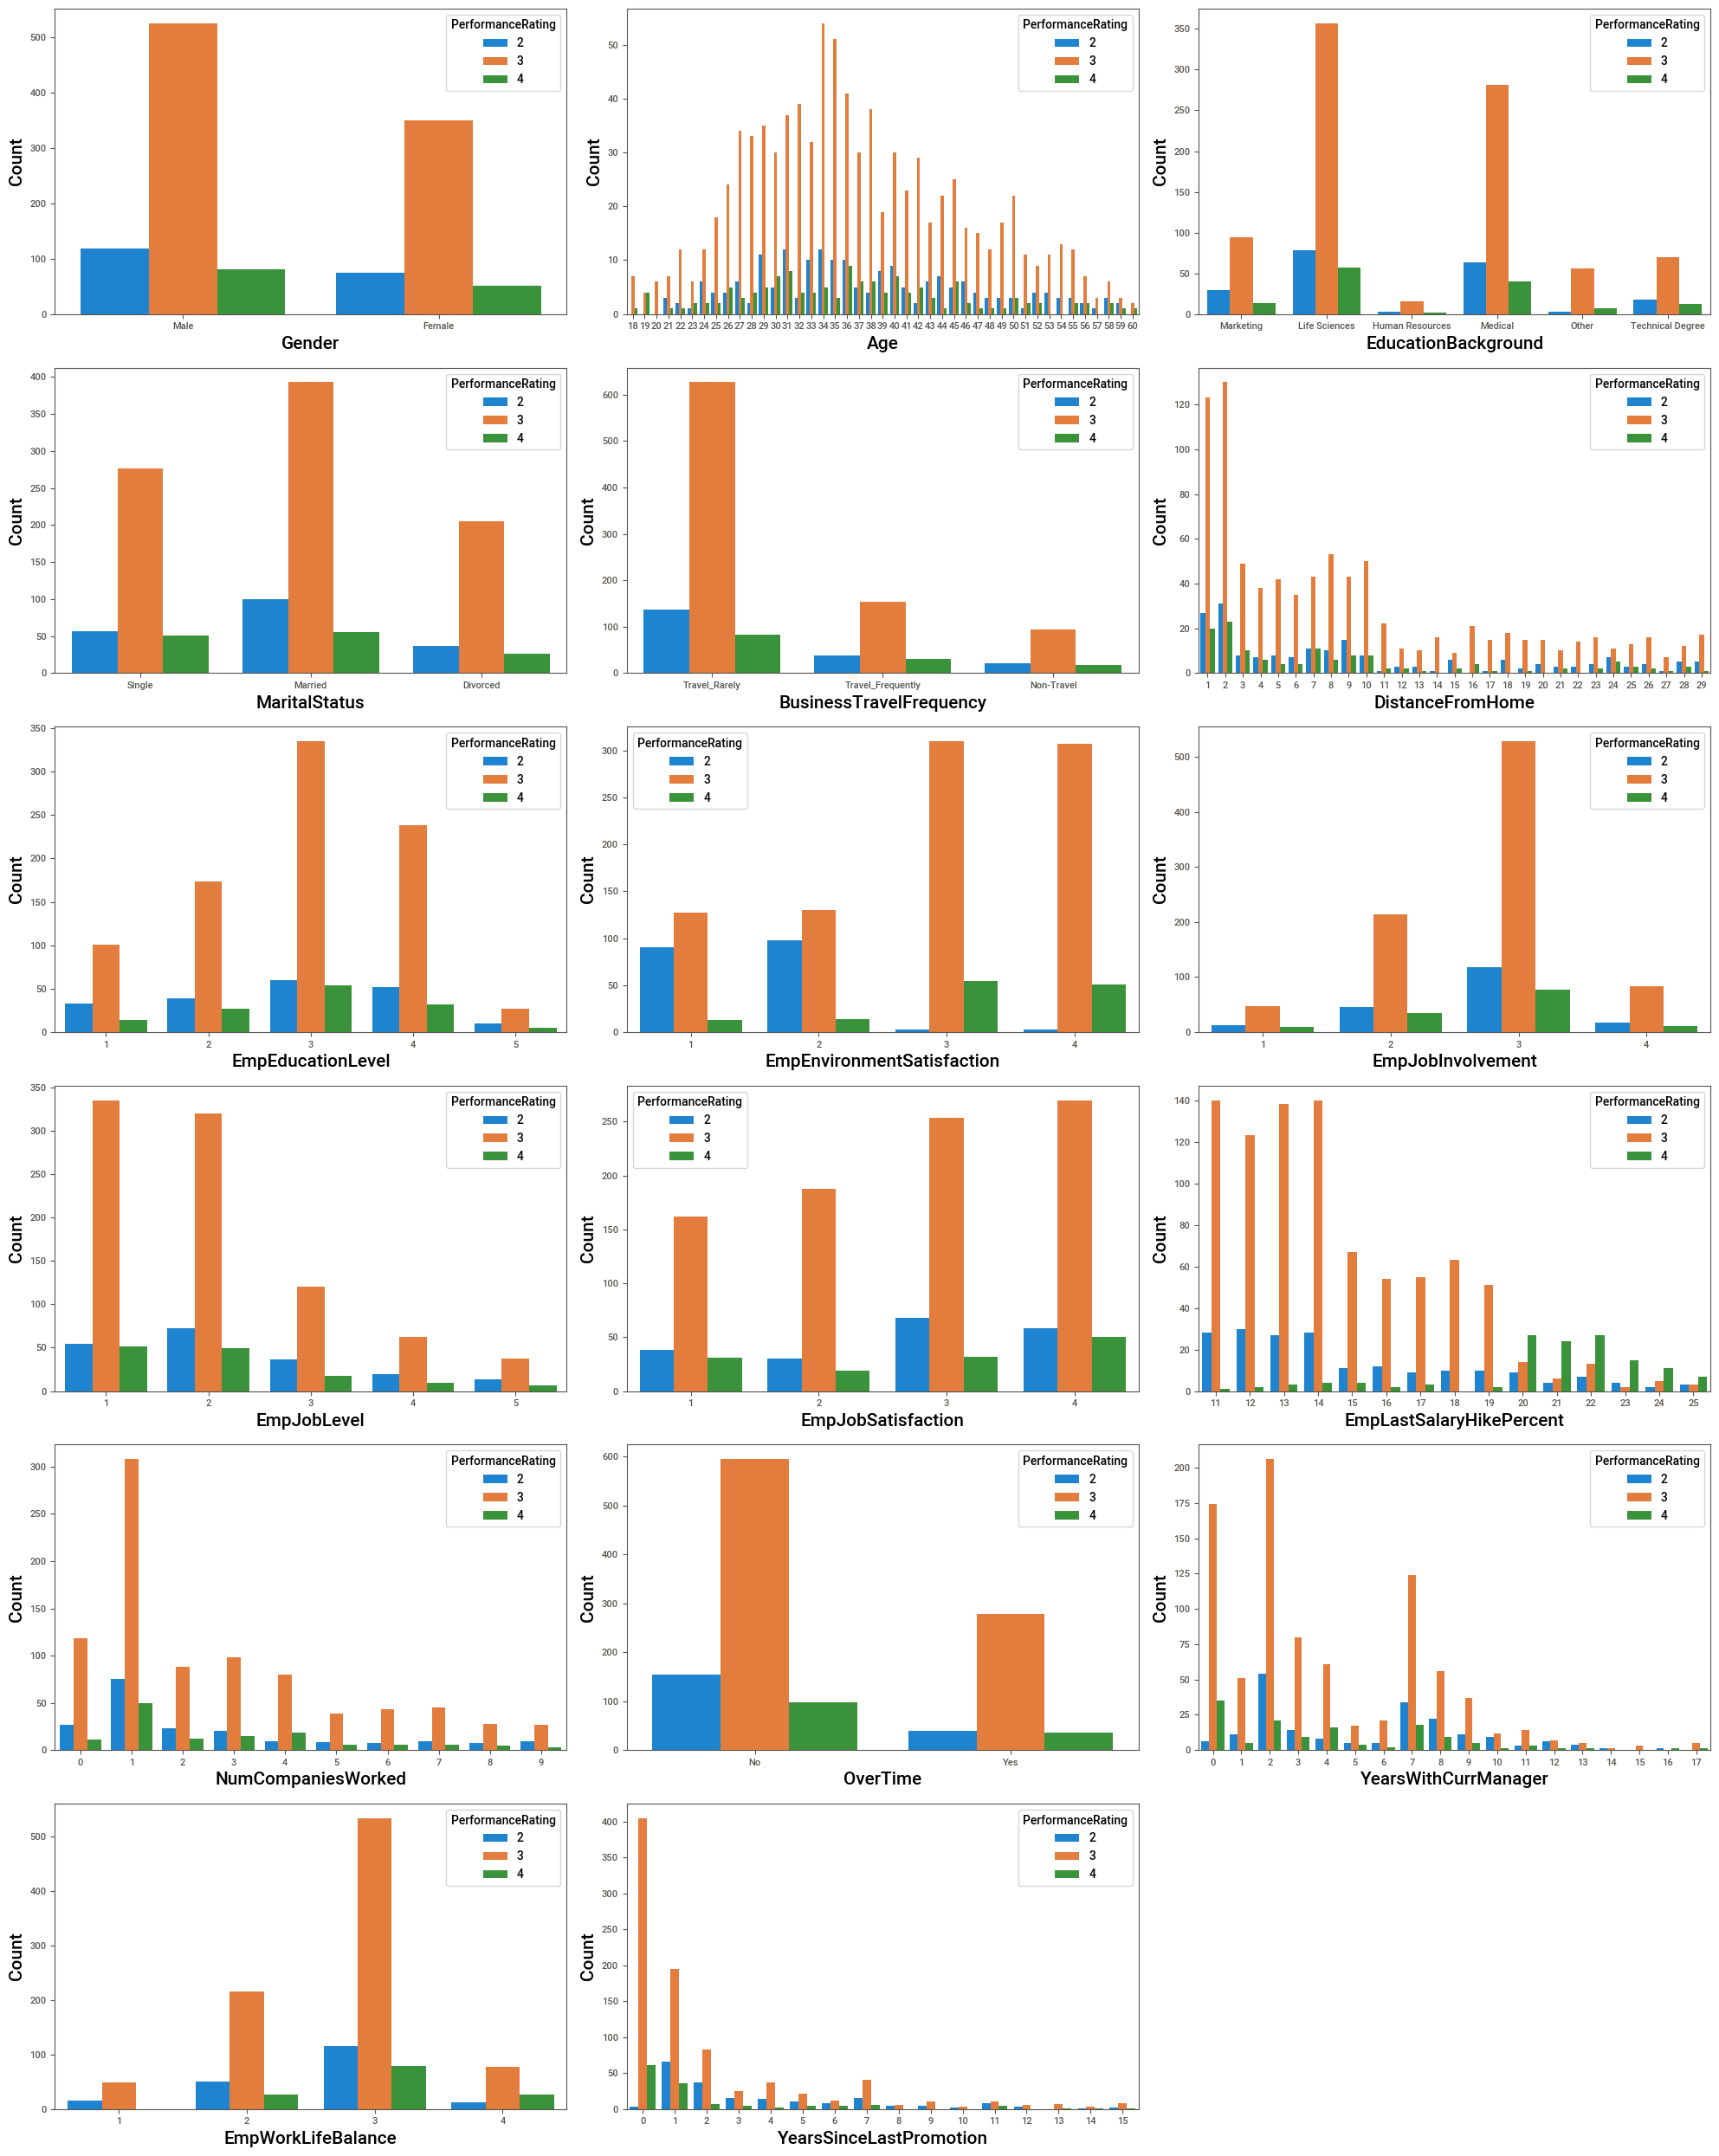

In [102]:
count = df[['Gender', 'Age', 'EducationBackground', 'MaritalStatus', 'BusinessTravelFrequency', 'DistanceFromHome',
             'EmpEducationLevel', 'EmpEnvironmentSatisfaction', 'EmpJobInvolvement', 'EmpJobLevel',
             'EmpJobSatisfaction', 'EmpLastSalaryHikePercent', 'NumCompaniesWorked', 'OverTime',
             'YearsWithCurrManager', 'EmpWorkLifeBalance', 'YearsSinceLastPromotion',
             'PerformanceRating']]

plt.figure(figsize = (20, 25))
plotno = 1

for column in count.columns[:-1]: 
    if plotno <= 18:
        plt.subplot(6, 3, plotno)
        sns.countplot(x = column, hue = 'PerformanceRating', data = count)
        plt.xlabel(column, fontsize = 15)
        plt.ylabel('Count', fontsize = 15)
    plotno += 1

plt.tight_layout()
plt.show()

#### INSIGHTS:
From the above count plot for all of the above features, it appears that the most significant factors which are influencing employee performance are:

1. **EmpLastSalaryHikePercent:** Employees who got higher salary hikes percentages tend to have higher performance ratings. Those employees have shown better performance rating as 4 (top rating).

2. **EmpEnvironmentSatisfaction:** Employees who report higher levels of satisfaction with their work environment tend to have higher performance ratings.

3. **YearsSinceLastPromotion:** Employees who are promoted in the last two years tend to show higher performance rating of 3 and 4.

After analyzing the count plot visualization,  the above mentioned features can be identified as those categories which are consistently showing higher proportion of employees with high performance ratings 3 and 4. Maximum employees fall in rating of 3 and 4.